In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import os
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

4.  In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.


In [2]:
df_iris = data('iris')

In [3]:
type(df_iris)

pandas.core.frame.DataFrame

print the first 3 rows

In [4]:
df_iris.head(3)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa

print the number of rows and columns (shape)

In [5]:
df_iris.shape

(150, 5)

print the column names

In [6]:
print(df_iris.columns.tolist()) #From notes

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']


print the data type of each column

In [7]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

print the summary statistics for each of the numeric variables

In [8]:
print(df_iris.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
#From class
df_iris.describe().T

count      mean       std  min  25%   50%  75%  max
Sepal.Length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
Sepal.Width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
Petal.Length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
Petal.Width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5

5. Read the data from this google sheet into a dataframe, df_google.

In [10]:


sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
    
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                    Name     Sex   Age  SibSp  \
0                                Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                                 Heikkinen, Miss. Laina  female  26.0      0   
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                               Allen, Mr. William Henry    male  35.0      0   
..                                                   ...     ...   ...    ...   
886                                Montvila, Rev. Juozas    male  27.0      0   
887                         Graham, Miss. Margaret Edith  female  19.0      0   
888             Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                                Behr, Mr. Karl Howell    male  26.0      0   
890                                  Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

print the first 3 rows

In [11]:
df_google.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

print the number of rows and columns

In [12]:
df_google.shape

(891, 12)

print the column names

In [13]:
print(df_google.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


print the data type of each column

In [14]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

print the summary statistics for each of the numeric variables

In [16]:
df_google.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

print the unique values for each of your categorical variables

In [17]:
df_google.value_counts

<bound method DataFrame.value_counts of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                    Name     Sex   Age  SibSp  \
0                                Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                                 Heikkinen, Miss. Laina  female  26.0      0   
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                               Allen, Mr. William Henry    male  35.0      0   
..               

6.  Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [18]:
df_excel = pd.read_excel('train.xlsx')
df_excel

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                    Name     Sex   Age  SibSp  \
0                                Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                                 Heikkinen, Miss. Laina  female  26.0      0   
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                               Allen, Mr. William Henry    male  35.0      0   
..                                                   ...     ...   ...    ...   
886                                Montvila, Rev. Juozas    male  27.0      0   
887                         Graham, Miss. Margaret Edith  female  19.0      0   
888             Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                                Behr, Mr. Karl Howell    male  26.0      0   
890                                  Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

assign the first 100 rows to a new dataframe, df_excel_sample

In [19]:
df_excel_sample = df_excel[df_excel.PassengerId <= 100]
df_excel_sample.shape

(100, 12)

print the number of rows of your original dataframe

In [20]:
df_excel.shape[0]

891

print the first 5 column names

In [21]:
print(df_excel.columns[:5])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')


print the column names that have a data type of object

In [22]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df_excel.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

compute the range for each of the numeric variables.

In [24]:
df_excel.select_dtypes(exclude='object').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [25]:
df_excel.select_dtypes(include='number').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [26]:
numbers = df_excel[['Age', 'Fare']]

In [27]:
numbers

Age     Fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
886  27.0  13.0000
887  19.0  30.0000
888   NaN  23.4500
889  26.0  30.0000
890  32.0   7.7500

[891 rows x 2 columns]

In [28]:
numbers.describe()

Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200

In [29]:
age_range = max(numbers.Age) - min(numbers.Age)
age_range

79.58

In [30]:
fare_range = numbers.Fare.max() - numbers.Fare.min()
fare_range

512.3292

everything else is a range of 1 numerically

Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [31]:
from env import get_db_url
import os

In [32]:
# def get_titanic_data():
#     filename = 'titanic.csv'
    
#     if os.path.isfile(filename):
#         return pd.read_csv(filename)
#     else:
#         # read the SQL query into a dataframe
#         titanic_db = pd.read_sql('SELECT * FROM passengers', get_db_url('titanic_db'))
        
#         # Write that dataframe to disk for later.  Called "caching" the data for later.
#         titanic_db.to_csv(filename)
        
#         return titanic_db

In [33]:
# def get_iris_data():
#     filename = 'iris.csv'
    
#     if os.path.isfile(filename):
#         return pd.read_csv(filename)
#     else:
#         #read the SQL query into a dataframe
#         iris_db = pd.read_sql('SELECT * FROM species JOIN measurements USING (species_id)', get_db_url('iris_db'))
        
#         # Write that dataframe to disk for later.  Called "caching" the data for later.
#         iris_db.to_csv(filename)
        
#     return iris_db

Use the function defined in acquire.py to load the Titanic data.

In [34]:
titanic_db = acquire.get_titanic_data()

In [35]:
iris_db = acquire.get_iris_data()

In [36]:
# def get_telco_data():
#     query = '''
#     SELECT * 
#     FROM customers
#     JOIN contract_types USING (contract_type_id)
#     JOIN internet_service_types USING (internet_service_type_id)
#     JOIN payment_types USING (payment_type_id);
#     '''
    
#     filename = 'telco.csv'
#     if os.path.isfile(filename):
#         return pd.read_csv(filename)
#     else: 
#         #read the SQL query into a dataframe
#         telco_churn_db = pd.read_sql(query, get_db_url('telco_churn'))
        
#         # Write that dataframe to disk for later.  Called "caching" the data for later.
#         telco_churn_db.to_csv(filename)
        
#     return telco_churn_db

In [37]:
os.path.exists('iris.csv') #Troubleshooting I want to remember

True

Use the function defined in acquire.py to load the iris data.

In [38]:
iris_db = acquire.get_iris_data()
iris_db

Unnamed: 0  species_id species_name  measurement_id  sepal_length  \
0             0           1       setosa               1           5.1   
1             1           1       setosa               2           4.9   
2             2           1       setosa               3           4.7   
3             3           1       setosa               4           4.6   
4             4           1       setosa               5           5.0   
5             5           1       setosa               6           5.4   
6             6           1       setosa               7           4.6   
7             7           1       setosa               8           5.0   
8             8           1       setosa               9           4.4   
9             9           1       setosa              10           4.9   
10           10           1       setosa              11           5.4   
11           11           1       setosa              12           4.8   
12           12           1       setosa              13           4.8   
13           13           1       setosa              14           4.3   
14           14           1       setosa              15           5.8   
15           15           1       setosa              16           5.7   
16           16           1       setosa              17           5.4   
17           17           1       setosa              18           5.1   
18           18           1       setosa              19           5.7   
19           19           1       setosa              20           5.1   
20           20           1       setosa              21           5.4   
21           21           1       setosa              22           5.1   
22           22           1       setosa              23           4.6   
23           23           1       setosa              24           5.1   
24           24           1       setosa              25           4.8   
25           25           1       setosa              26           5.0   
26           26           1       setosa              27           5.0   
27           27           1       setosa              28           5.2   
28           28           1       setosa              29           5.2   
29           29           1       setosa              30           4.7   
30           30           1       setosa              31           4.8   
31           31           1       setosa              32           5.4   
32           32           1       setosa              33           5.2   
33           33           1       setosa              34           5.5   
34           34           1       setosa              35           4.9   
35           35           1       setosa              36           5.0   
36           36           1       setosa              37           5.5   
37           37           1       setosa              38           4.9   
38           38           1       setosa              39           4.4   
39           39           1       setosa              40           5.1   
40           40           1       setosa              41           5.0   
41           41           1       setosa              42           4.5   
42           42           1       setosa              43           4.4   
43           43           1       setosa              44           5.0   
44           44           1       setosa              45           5.1   
45           45           1       setosa              46           4.8   
46           46           1       setosa              47           5.1   
47           47           1       setosa              48           4.6   
48           48           1       setosa              49           5.3   
49           49           1       setosa              50           5.0   
50           50           2   versicolor              51           7.0   
51           51           2   versicolor              52           6.4   
52           52           2   versicolor              53           6.9   
53       

Drop the species_id and measurement_id columns.

In [39]:
iris_db = iris_db.drop(columns=['species_id', 'measurement_id'])

Rename the species_name column to just species.

In [40]:
iris_db = iris_db.rename({'species_name': 'species'}, axis=1)

Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [41]:
iris_db

Unnamed: 0     species  sepal_length  sepal_width  petal_length  \
0             0      setosa           5.1          3.5           1.4   
1             1      setosa           4.9          3.0           1.4   
2             2      setosa           4.7          3.2           1.3   
3             3      setosa           4.6          3.1           1.5   
4             4      setosa           5.0          3.6           1.4   
5             5      setosa           5.4          3.9           1.7   
6             6      setosa           4.6          3.4           1.4   
7             7      setosa           5.0          3.4           1.5   
8             8      setosa           4.4          2.9           1.4   
9             9      setosa           4.9          3.1           1.5   
10           10      setosa           5.4          3.7           1.5   
11           11      setosa           4.8          3.4           1.6   
12           12      setosa           4.8          3.0           1.4   
13           13      setosa           4.3          3.0           1.1   
14           14      setosa           5.8          4.0           1.2   
15           15      setosa           5.7          4.4           1.5   
16           16      setosa           5.4          3.9           1.3   
17           17      setosa           5.1          3.5           1.4   
18           18      setosa           5.7          3.8           1.7   
19           19      setosa           5.1          3.8           1.5   
20           20      setosa           5.4          3.4           1.7   
21           21      setosa           5.1          3.7           1.5   
22           22      setosa           4.6          3.6           1.0   
23           23      setosa           5.1          3.3           1.7   
24           24      setosa           4.8          3.4           1.9   
25           25      setosa           5.0          3.0           1.6   
26           26      setosa           5.0          3.4           1.6   
27           27      setosa           5.2          3.5           1.5   
28           28      setosa           5.2          3.4           1.4   
29           29      setosa           4.7          3.2           1.6   
30           30      setosa           4.8          3.1           1.6   
31           31      setosa           5.4          3.4           1.5   
32           32      setosa           5.2          4.1           1.5   
33           33      setosa           5.5          4.2           1.4   
34           34      setosa           4.9          3.1           1.5   
35           35      setosa           5.0          3.2           1.2   
36           36      setosa           5.5          3.5           1.3   
37           37      setosa           4.9          3.6           1.4   
38           38      setosa           4.4          3.0           1.3   
39           39      setosa           5.1          3.4           1.5   
40           40      setosa           5.0          3.5           1.3   
41           41      setosa           4.5          2.3           1.3   
42           42      setosa           4.4          3.2           1.3   
43           43      setosa           5.0          3.5           1.6   
44           44      setosa           5.1          3.8           1.9   
45           45      setosa           4.8          3.0           1.4   
46           46      setosa           5.1          3.8           1.6   
47           47      setosa           4.6          3.2           1.4   
48           48      setosa           5.3          3.7           1.5   
49           49      setosa           5.0          3.3           1.4   
50           50  versicolor           7.0          3.2           4.7   
51           51  versicolor           6.4          3.2           4.5   
52           52  versicolor           6.9          3.1           4.9   
53           53  versicolor           5.5          2.3           4.0   
54           54  versicolor           6.5    

In [42]:
dummy_iris_db = pd.get_dummies(iris_db['species'], dummy_na=False, drop_first=[True])

In [43]:
dummy_iris_db

versicolor  virginica
0             0          0
1             0          0
2             0          0
3             0          0
4             0          0
5             0          0
6             0          0
7             0          0
8             0          0
9             0          0
10            0          0
11            0          0
12            0          0
13            0          0
14            0          0
15            0          0
16            0          0
17            0          0
18            0          0
19            0          0
20            0          0
21            0          0
22            0          0
23            0          0
24            0          0
25            0          0
26            0          0
27            0          0
28            0          0
29            0          0
30            0          0
31            0          0
32            0          0
33            0          0
34            0          0
35            0          0
36            0          0
37            0          0
38            0          0
39            0          0
40            0          0
41            0          0
42            0          0
43            0          0
44            0          0
45            0          0
46            0          0
47            0          0
48            0          0
49            0          0
50            1          0
51            1          0
52            1          0
53            1          0
54            1          0
55            1          0
56            1          0
57            1          0
58            1          0
59            1          0
60            1          0
61            1          0
62            1          0
63            1          0
64            1          0
65            1          0
66            1          0
67            1          0
68            1          0
69            1          0
70            1          0
71            1          0
72            1          0
73            1          0
74            1          0
75            1          0
76            1          0
77            1          0
78            1          0
79            1          0
80            1          0
81            1          0
82            1          0
83            1          0
84            1          0
85            1          0
86            1          0
87            1          0
88            1          0
89            1          0
90            1          0
91            1          0
92            1          0
93            1          0
94            1          0
95            1          0
96            1          0
97            1          0
98            1          0
99            1          0
100           0          1
101           0          1
102           0          1
103           0          1
104           0          1
105           0          1
106           0          1
107           0          1
108           0          1
109           0          1
110           0          1
111           0          1
112           0          1
113           0          1
114           0          1
115           0          1
116           0          1
117           0          1
118           0          1
119           0          1
120           0          1
121           0          1
122           0          1
123           0          1
124           0          1
125           0          1
126           0          1
127           0          1
128           0          1
129           0          1
130           0          1
131           0          1
132           0          1
133           0          1
134           0          1
135           0          1
136           0          1
137           0          1
138           0          1
139           0          1
140           0          1
141           0          1
142           0          1
143           0          1
144           0          1
145           0          1
146           0          1
147      

In [44]:
iris_db = pd.concat([iris_db, dummy_iris_db], axis=1)
iris_db

Unnamed: 0     species  sepal_length  sepal_width  petal_length  \
0             0      setosa           5.1          3.5           1.4   
1             1      setosa           4.9          3.0           1.4   
2             2      setosa           4.7          3.2           1.3   
3             3      setosa           4.6          3.1           1.5   
4             4      setosa           5.0          3.6           1.4   
5             5      setosa           5.4          3.9           1.7   
6             6      setosa           4.6          3.4           1.4   
7             7      setosa           5.0          3.4           1.5   
8             8      setosa           4.4          2.9           1.4   
9             9      setosa           4.9          3.1           1.5   
10           10      setosa           5.4          3.7           1.5   
11           11      setosa           4.8          3.4           1.6   
12           12      setosa           4.8          3.0           1.4   
13           13      setosa           4.3          3.0           1.1   
14           14      setosa           5.8          4.0           1.2   
15           15      setosa           5.7          4.4           1.5   
16           16      setosa           5.4          3.9           1.3   
17           17      setosa           5.1          3.5           1.4   
18           18      setosa           5.7          3.8           1.7   
19           19      setosa           5.1          3.8           1.5   
20           20      setosa           5.4          3.4           1.7   
21           21      setosa           5.1          3.7           1.5   
22           22      setosa           4.6          3.6           1.0   
23           23      setosa           5.1          3.3           1.7   
24           24      setosa           4.8          3.4           1.9   
25           25      setosa           5.0          3.0           1.6   
26           26      setosa           5.0          3.4           1.6   
27           27      setosa           5.2          3.5           1.5   
28           28      setosa           5.2          3.4           1.4   
29           29      setosa           4.7          3.2           1.6   
30           30      setosa           4.8          3.1           1.6   
31           31      setosa           5.4          3.4           1.5   
32           32      setosa           5.2          4.1           1.5   
33           33      setosa           5.5          4.2           1.4   
34           34      setosa           4.9          3.1           1.5   
35           35      setosa           5.0          3.2           1.2   
36           36      setosa           5.5          3.5           1.3   
37           37      setosa           4.9          3.6           1.4   
38           38      setosa           4.4          3.0           1.3   
39           39      setosa           5.1          3.4           1.5   
40           40      setosa           5.0          3.5           1.3   
41           41      setosa           4.5          2.3           1.3   
42           42      setosa           4.4          3.2           1.3   
43           43      setosa           5.0          3.5           1.6   
44           44      setosa           5.1          3.8           1.9   
45           45      setosa           4.8          3.0           1.4   
46           46      setosa           5.1          3.8           1.6   
47           47      setosa           4.6          3.2           1.4   
48           48      setosa           5.3          3.7           1.5   
49           49      setosa           5.0          3.3           1.4   
50           50  versicolor           7.0          3.2           4.7   
51           51  versicolor           6.4          3.2           4.5   
52           52  versicolor           6.9          3.1           4.9   
53           53  versicolor           5.5          2.3           4.0   
54           54  versicolor           6.5    

Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [45]:
def prep_iris():
    iris_db = acquire.get_iris_data()
    iris_db = iris_db.drop(columns=['species_id', 'measurement_id'])
    iris_db = iris_db.rename({'species_name': 'species'}, axis=1)
    dummy_iris_db = pd.get_dummies(iris_db['species'], dummy_na=False, drop_first=[True])
    iris_db = pd.concat([iris_db, dummy_iris_db], axis=1)
    return iris_db

In [46]:
prep_iris()

Unnamed: 0     species  sepal_length  sepal_width  petal_length  \
0             0      setosa           5.1          3.5           1.4   
1             1      setosa           4.9          3.0           1.4   
2             2      setosa           4.7          3.2           1.3   
3             3      setosa           4.6          3.1           1.5   
4             4      setosa           5.0          3.6           1.4   
5             5      setosa           5.4          3.9           1.7   
6             6      setosa           4.6          3.4           1.4   
7             7      setosa           5.0          3.4           1.5   
8             8      setosa           4.4          2.9           1.4   
9             9      setosa           4.9          3.1           1.5   
10           10      setosa           5.4          3.7           1.5   
11           11      setosa           4.8          3.4           1.6   
12           12      setosa           4.8          3.0           1.4   
13           13      setosa           4.3          3.0           1.1   
14           14      setosa           5.8          4.0           1.2   
15           15      setosa           5.7          4.4           1.5   
16           16      setosa           5.4          3.9           1.3   
17           17      setosa           5.1          3.5           1.4   
18           18      setosa           5.7          3.8           1.7   
19           19      setosa           5.1          3.8           1.5   
20           20      setosa           5.4          3.4           1.7   
21           21      setosa           5.1          3.7           1.5   
22           22      setosa           4.6          3.6           1.0   
23           23      setosa           5.1          3.3           1.7   
24           24      setosa           4.8          3.4           1.9   
25           25      setosa           5.0          3.0           1.6   
26           26      setosa           5.0          3.4           1.6   
27           27      setosa           5.2          3.5           1.5   
28           28      setosa           5.2          3.4           1.4   
29           29      setosa           4.7          3.2           1.6   
30           30      setosa           4.8          3.1           1.6   
31           31      setosa           5.4          3.4           1.5   
32           32      setosa           5.2          4.1           1.5   
33           33      setosa           5.5          4.2           1.4   
34           34      setosa           4.9          3.1           1.5   
35           35      setosa           5.0          3.2           1.2   
36           36      setosa           5.5          3.5           1.3   
37           37      setosa           4.9          3.6           1.4   
38           38      setosa           4.4          3.0           1.3   
39           39      setosa           5.1          3.4           1.5   
40           40      setosa           5.0          3.5           1.3   
41           41      setosa           4.5          2.3           1.3   
42           42      setosa           4.4          3.2           1.3   
43           43      setosa           5.0          3.5           1.6   
44           44      setosa           5.1          3.8           1.9   
45           45      setosa           4.8          3.0           1.4   
46           46      setosa           5.1          3.8           1.6   
47           47      setosa           4.6          3.2           1.4   
48           48      setosa           5.3          3.7           1.5   
49           49      setosa           5.0          3.3           1.4   
50           50  versicolor           7.0          3.2           4.7   
51           51  versicolor           6.4          3.2           4.5   
52           52  versicolor           6.9          3.1           4.9   
53           53  versicolor           5.5          2.3           4.0   
54           54  versicolor           6.5    

# Titanic Dataset

Use the function defined in acquire.py to load the Titanic data.

In [47]:
titanic_db = acquire.get_titanic_data()

In [48]:
titanic_db

Unnamed: 0  passenger_id  survived  pclass     sex   age  sibsp  parch  \
0             0             0         0       3    male  22.0      1      0   
1             1             1         1       1  female  38.0      1      0   
2             2             2         1       3  female  26.0      0      0   
3             3             3         1       1  female  35.0      1      0   
4             4             4         0       3    male  35.0      0      0   
..          ...           ...       ...     ...     ...   ...    ...    ...   
886         886           886         0       2    male  27.0      0      0   
887         887           887         1       1  female  19.0      0      0   
888         888           888         0       3  female   NaN      1      2   
889         889           889         1       1    male  26.0      0      0   
890         890           890         0       3    male  32.0      0      0   

        fare embarked   class deck  embark_town  alone  
0     7.2500        S   Third  NaN  Southampton      0  
1    71.2833        C   First    C    Cherbourg      0  
2     7.9250        S   Third  NaN  Southampton      1  
3    53.1000        S   First    C  Southampton      0  
4     8.0500        S   Third  NaN  Southampton      1  
..       ...      ...     ...  ...          ...    ...  
886  13.0000        S  Second  NaN  Southampton      1  
887  30.0000        S   First    B  Southampton      1  
888  23.4500        S   Third  NaN  Southampton      0  
889  30.0000        C   First    C    Cherbourg      1  
890   7.7500        Q   Third  NaN   Queenstown      1  

[891 rows x 14 columns]

In [49]:
titanic_db.deck.value_counts().sum()

203

In [50]:
titanic_db.age.value_counts().sum()

714

Drop any unnecessary, unhelpful, or duplicated columns.

In [51]:
titanic_db = titanic_db.drop(columns=['age', 'embarked', 'class', 'deck'])

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [52]:
dummy_titanic_db = pd.get_dummies(titanic_db[['sex', 'embark_town']], dummy_na=False, drop_first = [True, True])

In [53]:
dummy_titanic_db.head()

sex_male  embark_town_Queenstown  embark_town_Southampton
0         1                       0                        1
1         0                       0                        0
2         0                       0                        1
3         0                       0                        1
4         1                       0                        1

In [54]:
titanic_db = pd.concat([titanic_db, dummy_titanic_db], axis=1)
titanic_db

Unnamed: 0  passenger_id  survived  pclass     sex  sibsp  parch  \
0             0             0         0       3    male      1      0   
1             1             1         1       1  female      1      0   
2             2             2         1       3  female      0      0   
3             3             3         1       1  female      1      0   
4             4             4         0       3    male      0      0   
..          ...           ...       ...     ...     ...    ...    ...   
886         886           886         0       2    male      0      0   
887         887           887         1       1  female      0      0   
888         888           888         0       3  female      1      2   
889         889           889         1       1    male      0      0   
890         890           890         0       3    male      0      0   

        fare  embark_town  alone  sex_male  embark_town_Queenstown  \
0     7.2500  Southampton      0         1                       0   
1    71.2833    Cherbourg      0         0                       0   
2     7.9250  Southampton      1         0                       0   
3    53.1000  Southampton      0         0                       0   
4     8.0500  Southampton      1         1                       0   
..       ...          ...    ...       ...                     ...   
886  13.0000  Southampton      1         1                       0   
887  30.0000  Southampton      1         0                       0   
888  23.4500  Southampton      0         0                       0   
889  30.0000    Cherbourg      1         1                       0   
890   7.7500   Queenstown      1         1                       1   

     embark_town_Southampton  
0                          1  
1                          0  
2                          1  
3                          1  
4                          1  
..                       ...  
886                        1  
887                        1  
888                        1  
889                        0  
890                        0  

[891 rows x 13 columns]

Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [55]:
def prep_titanic():
    titanic_db = acquire.get_titanic_data()
    titanic_db = titanic_db.drop(columns=['age', 'embarked', 'class', 'deck'])
    dummy_titanic_db = pd.get_dummies(titanic_db[['sex', 'embark_town']], dummy_na=False, drop_first = [True])#, True])
    titanic_db = pd.concat([titanic_db, dummy_titanic_db], axis=1)
    return titanic_db

In [56]:
prep_titanic()

Unnamed: 0  passenger_id  survived  pclass     sex  sibsp  parch  \
0             0             0         0       3    male      1      0   
1             1             1         1       1  female      1      0   
2             2             2         1       3  female      0      0   
3             3             3         1       1  female      1      0   
4             4             4         0       3    male      0      0   
..          ...           ...       ...     ...     ...    ...    ...   
886         886           886         0       2    male      0      0   
887         887           887         1       1  female      0      0   
888         888           888         0       3  female      1      2   
889         889           889         1       1    male      0      0   
890         890           890         0       3    male      0      0   

        fare  embark_town  alone  sex_male  embark_town_Queenstown  \
0     7.2500  Southampton      0         1                       0   
1    71.2833    Cherbourg      0         0                       0   
2     7.9250  Southampton      1         0                       0   
3    53.1000  Southampton      0         0                       0   
4     8.0500  Southampton      1         1                       0   
..       ...          ...    ...       ...                     ...   
886  13.0000  Southampton      1         1                       0   
887  30.0000  Southampton      1         0                       0   
888  23.4500  Southampton      0         0                       0   
889  30.0000    Cherbourg      1         1                       0   
890   7.7500   Queenstown      1         1                       1   

     embark_town_Southampton  
0                          1  
1                          0  
2                          1  
3                          1  
4                          1  
..                       ...  
886                        1  
887                        1  
888                        1  
889                        0  
890                        0  

[891 rows x 13 columns]

# Telco Dataset

Use the function defined in acquire.py to load the Telco data.

In [57]:
telco_churn_db = acquire.get_telco_data()

In [58]:
telco_churn_db

Unnamed: 0  payment_type_id  internet_service_type_id  contract_type_id  \
0              0                2                         1                 2   
1              1                2                         1                 1   
2              2                1                         2                 1   
3              3                1                         2                 1   
4              4                2                         2                 1   
...          ...              ...                       ...               ...   
7038        7038                2                         1                 2   
7039        7039                1                         2                 1   
7040        7040                2                         1                 1   
7041        7041                2                         1                 3   
7042        7042                1                         1                 3   

     customer_id  gender  senior_citizen partner dependents  tenure  ...  \
0     0002-ORFBO  Female               0     Yes        Yes       9  ...   
1     0003-MKNFE    Male               0      No         No       9  ...   
2     0004-TLHLJ    Male               0      No         No       4  ...   
3     0011-IGKFF    Male               1     Yes         No      13  ...   
4     0013-EXCHZ  Female               1     Yes         No       3  ...   
...          ...     ...             ...     ...        ...     ...  ...   
7038  9987-LUTYD  Female               0      No         No      13  ...   
7039  9992-RRAMN    Male               0     Yes         No      22  ...   
7040  9992-UJOEL    Male               0      No         No       2  ...   
7041  9993-LHIEB    Male               0     Yes        Yes      67  ...   
7042  9995-HOTOH    Male               0     Yes        Yes      63  ...   

     tech_support streaming_tv streaming_movies paperless_billing  \
0             Yes          Yes               No               Yes   
1              No           No              Yes                No   
2              No           No               No               Yes   
3              No          Yes              Yes               Yes   
4             Yes          Yes               No               Yes   
...           ...          ...              ...               ...   
7038          Yes           No               No                No   
7039           No           No              Yes               Yes   
7040           No           No               No               Yes   
7041          Yes           No              Yes                No   
7042           No          Yes              Yes                No   

     monthly_charges total_charges churn   contract_type  \
0              65.60         593.3    No        One year   
1              59.90         542.4    No  Month-to-month   
2              73.90        280.85   Yes  Month-to-month   
3              98.00       1237.85   Yes  Month-to-month   
4              83.90         267.4   Yes  Month-to-month   
...              ...           ...   ...             ...   
7038           55.15         742.9    No        One year   
7039           85.10        1873.7   Yes  Month-to-month   
7040           50.30         92.75    No  Month-to-month   
7041           67.85       4627.65    No        Two year   
7042           59.00        3707.6    No        Two year   

     internet_service_type      payment_type  
0                      DSL      Mailed check  
1                      DSL      Mailed check  
2              Fiber optic  Electronic check  
3              Fiber optic  Electronic check  
4              Fiber optic      Mailed check  
...                    ...               ...  
7038                   DSL      Mailed check  
7039           Fiber optic  Electronic check  
7040                   DSL      Mailed check  
7041                   DSL      Mailed check  
7042                   DSL  Electronic check  

[7043

In [59]:
telco_churn_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [60]:
for col in telco_churn_db.columns:
    print(col.upper())
    print(telco_churn_db[col].value_counts(dropna=False))

UNNAMED: 0
0       1
4691    1
4702    1
4701    1
4700    1
       ..
2344    1
2343    1
2342    1
2341    1
7042    1
Name: Unnamed: 0, Length: 7043, dtype: int64
PAYMENT_TYPE_ID
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
INTERNET_SERVICE_TYPE_ID
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
CONTRACT_TYPE_ID
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
CUSTOMER_ID
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
GENDER
Male      3555
Female    3488
Name: gender, dtype: int64
SENIOR_CITIZEN
0    5901
1    1142
Name: senior_citizen, dtype: int64
PARTNER
No     3641
Yes    3402
Name: partner, dtype: int64
DEPENDENTS
No     4933
Yes    2110
Name: dependents, dtype: int64
TENURE
1     613
72    362
2     238
3     200
4     176
71    1

In [61]:
telco_churn_db.head().T #from class review

0               1                 2  \
Unnamed: 0                           0               1                 2   
payment_type_id                      2               2                 1   
internet_service_type_id             1               1                 2   
contract_type_id                     2               1                 1   
customer_id                 0002-ORFBO      0003-MKNFE        0004-TLHLJ   
gender                          Female            Male              Male   
senior_citizen                       0               0                 0   
partner                            Yes              No                No   
dependents                         Yes              No                No   
tenure                               9               9                 4   
phone_service                      Yes             Yes               Yes   
multiple_lines                      No             Yes                No   
online_security                     No              No                No   
online_backup                      Yes              No                No   
device_protection                   No              No               Yes   
tech_support                       Yes              No                No   
streaming_tv                       Yes              No                No   
streaming_movies                    No             Yes                No   
paperless_billing                  Yes              No               Yes   
monthly_charges                   65.6            59.9              73.9   
total_charges                    593.3           542.4            280.85   
churn                               No              No               Yes   
contract_type                 One year  Month-to-month    Month-to-month   
internet_service_type              DSL             DSL       Fiber optic   
payment_type              Mailed check    Mailed check  Electronic check   

                                         3               4  
Unnamed: 0                               3               4  
payment_type_id                          1               2  
internet_service_type_id                 2               2  
contract_type_id                         1               1  
customer_id                     0011-IGKFF      0013-EXCHZ  
gender                                Male          Female  
senior_citizen                           1               1  
partner                                Yes             Yes  
dependents                              No              No  
tenure                                  13               3  
phone_service                          Yes             Yes  
multiple_lines                          No              No  
online_security                         No              No  
online_backup                          Yes              No  
device_protection                      Yes              No  
tech_support                            No             Yes  
streaming_tv                           Yes             Yes  
streaming_movies                       Yes              No  
paperless_billing                      Yes             Yes  
monthly_charges                       98.0            83.9  
total_charges                      1237.85           267.4  
churn                                  Yes             Yes  
contract_type               Month-to-month  Month-to-month  
internet_service_type          Fiber optic     Fiber optic  
payment_type              Electronic check    Mailed check

Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [62]:
pd.crosstab(telco_churn_db.payment_type, telco_churn_db.payment_type_id)

payment_type_id               1     2     3     4
payment_type                                     
Bank transfer (automatic)     0     0  1544     0
Credit card (automatic)       0     0     0  1522
Electronic check           2365     0     0     0
Mailed check                  0  1612     0     0

In [63]:
pd.crosstab(telco_churn_db.internet_service_type, telco_churn_db.internet_service_type_id)

internet_service_type_id     1     2     3
internet_service_type                     
DSL                       2421     0     0
Fiber optic                  0  3096     0
None                         0     0  1526

In [64]:
pd.crosstab(telco_churn_db.contract_type, telco_churn_db.contract_type_id)

contract_type_id     1     2     3
contract_type                     
Month-to-month    3875     0     0
One year             0  1473     0
Two year             0     0  1695

In [65]:
telco_churn_db = telco_churn_db.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])

In [66]:
telco_churn_db.T

0               1                 2     \
Unnamed: 0                        0               1                 2   
customer_id              0002-ORFBO      0003-MKNFE        0004-TLHLJ   
gender                       Female            Male              Male   
senior_citizen                    0               0                 0   
partner                         Yes              No                No   
dependents                      Yes              No                No   
tenure                            9               9                 4   
phone_service                   Yes             Yes               Yes   
multiple_lines                   No             Yes                No   
online_security                  No              No                No   
online_backup                   Yes              No                No   
device_protection                No              No               Yes   
tech_support                    Yes              No                No   
streaming_tv                    Yes              No                No   
streaming_movies                 No             Yes                No   
paperless_billing               Yes              No               Yes   
monthly_charges                65.6            59.9              73.9   
total_charges                 593.3           542.4            280.85   
churn                            No              No               Yes   
contract_type              One year  Month-to-month    Month-to-month   
internet_service_type           DSL             DSL       Fiber optic   
payment_type           Mailed check    Mailed check  Electronic check   

                                   3               4     \
Unnamed: 0                            3               4   
customer_id                  0011-IGKFF      0013-EXCHZ   
gender                             Male          Female   
senior_citizen                        1               1   
partner                             Yes             Yes   
dependents                           No              No   
tenure                               13               3   
phone_service                       Yes             Yes   
multiple_lines                       No              No   
online_security                      No              No   
online_backup                       Yes              No   
device_protection                   Yes              No   
tech_support                         No             Yes   
streaming_tv                        Yes             Yes   
streaming_movies                    Yes              No   
paperless_billing                   Yes             Yes   
monthly_charges                    98.0            83.9   
total_charges                   1237.85           267.4   
churn                               Yes             Yes   
contract_type            Month-to-month  Month-to-month   
internet_service_type       Fiber optic     Fiber optic   
payment_type           Electronic check    Mailed check   

                                          5                          6     \
Unnamed: 0                                   5                          6   
customer_id                         0013-MHZWF                 0013-SMEOE   
gender                                  Female                     Female   
senior_citizen                               0                          1   
partner                                     No                        Yes   
dependents                                 Yes                         No   
tenure                                       9                         71   
phone_service                              Yes                        Yes   
multiple_lines                              No                         No   
online_security                             No                        Yes   
online_backup                               No                        Yes   
device_protection                           No                       

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [67]:
dummy_telco_churn_db = pd.get_dummies(telco_churn_db[['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']], dummy_na=False, drop_first=True)

In [68]:
dummy_telco_churn_db

gender_Male  partner_Yes  dependents_Yes  phone_service_Yes  \
0               0            1               1                  1   
1               1            0               0                  1   
2               1            0               0                  1   
3               1            1               0                  1   
4               0            1               0                  1   
...           ...          ...             ...                ...   
7038            0            0               0                  1   
7039            1            1               0                  1   
7040            1            0               0                  1   
7041            1            1               1                  1   
7042            1            1               1                  0   

      multiple_lines_No phone service  multiple_lines_Yes  \
0                                   0                   0   
1                                   0                   1   
2                                   0                   0   
3                                   0                   0   
4                                   0                   0   
...                               ...                 ...   
7038                                0                   0   
7039                                0                   1   
7040                                0                   0   
7041                                0                   0   
7042                                1                   0   

      online_security_No internet service  online_security_Yes  \
0                                       0                    0   
1                                       0                    0   
2                                       0                    0   
3                                       0                    0   
4                                       0                    0   
...                                   ...                  ...   
7038                                    0                    1   
7039                                    0                    0   
7040                                    0                    0   
7041                                    0                    1   
7042                                    0                    1   

      online_backup_No internet service  online_backup_Yes  ...  \
0                                     0                  1  ...   
1                                     0                  0  ...   
2                                     0                  0  ...   
3                                     0                  1  ...   
4                                     0                  0  ...   
...                                 ...                ...  ...   
7038                                  0                  0  ...   
7039                                  0                  0  ...   
7040                                  0                  1  ...   
7041                                  0                  0  ...   
7042                                  0                  1  ...   

      streaming_movies_Yes  paperless_billing_Yes  churn_Yes  \
0                        0                      1          0   
1                        1                      0          0   
2                        0                      1          1   
3                        1                      1          1   
4                        0                      1          1   
...                    ...                    ...        ...   
7038                     0                      0          0   
7039                     1                      1          1   
7040                     0                      1          0   
7041                     1                      0          0   
7042                     1                      0          0   

      contract_type_One year  contract_type_Two year  \
0                    

In [69]:
telco_churn_db = pd.concat([telco_churn_db, dummy_telco_churn_db], axis=1)

In [70]:
telco_churn_db.T

0               1     \
Unnamed: 0                                        0               1   
customer_id                              0002-ORFBO      0003-MKNFE   
gender                                       Female            Male   
senior_citizen                                    0               0   
partner                                         Yes              No   
dependents                                      Yes              No   
tenure                                            9               9   
phone_service                                   Yes             Yes   
multiple_lines                                   No             Yes   
online_security                                  No              No   
online_backup                                   Yes              No   
device_protection                                No              No   
tech_support                                    Yes              No   
streaming_tv                                    Yes              No   
streaming_movies                                 No             Yes   
paperless_billing                               Yes              No   
monthly_charges                                65.6            59.9   
total_charges                                 593.3           542.4   
churn                                            No              No   
contract_type                              One year  Month-to-month   
internet_service_type                           DSL             DSL   
payment_type                           Mailed check    Mailed check   
gender_Male                                       0               1   
partner_Yes                                       1               0   
dependents_Yes                                    1               0   
phone_service_Yes                                 1               1   
multiple_lines_No phone service                   0               0   
multiple_lines_Yes                                0               1   
online_security_No internet service               0               0   
online_security_Yes                               0               0   
online_backup_No internet service                 0               0   
online_backup_Yes                                 1               0   
device_protection_No internet service             0               0   
device_protection_Yes                             0               0   
tech_support_No internet service                  0               0   
tech_support_Yes                                  1               0   
streaming_tv_No internet service                  0               0   
streaming_tv_Yes                                  1               0   
streaming_movies_No internet service              0               0   
streaming_movies_Yes                              0               1   
paperless_billing_Yes                             1               0   
churn_Yes                                         0               0   
contract_type_One year                            1               0   
contract_type_Two year                            0               0   
internet_service_type_Fiber optic                 0               0   
internet_service_type_None                        0               0   
payment_type_Credit card (automatic)              0               0   
payment_type_Electronic check                     0               0   
payment_type_Mailed check                         1               1   

                                                   2                 3     \
Unnamed: 0                                            2                 3   
customer_id                                  0004-TLHLJ        0011-IGKFF   
gender                                             Male              Male   
senior_citizen                                        0                 1   
partner                                              No               Yes   
dependents                        

In [71]:
telco_churn_db

Unnamed: 0 customer_id  gender  senior_citizen partner dependents  \
0              0  0002-ORFBO  Female               0     Yes        Yes   
1              1  0003-MKNFE    Male               0      No         No   
2              2  0004-TLHLJ    Male               0      No         No   
3              3  0011-IGKFF    Male               1     Yes         No   
4              4  0013-EXCHZ  Female               1     Yes         No   
...          ...         ...     ...             ...     ...        ...   
7038        7038  9987-LUTYD  Female               0      No         No   
7039        7039  9992-RRAMN    Male               0     Yes         No   
7040        7040  9992-UJOEL    Male               0      No         No   
7041        7041  9993-LHIEB    Male               0     Yes        Yes   
7042        7042  9995-HOTOH    Male               0     Yes        Yes   

      tenure phone_service    multiple_lines online_security  ...  \
0          9           Yes                No              No  ...   
1          9           Yes               Yes              No  ...   
2          4           Yes                No              No  ...   
3         13           Yes                No              No  ...   
4          3           Yes                No              No  ...   
...      ...           ...               ...             ...  ...   
7038      13           Yes                No             Yes  ...   
7039      22           Yes               Yes              No  ...   
7040       2           Yes                No              No  ...   
7041      67           Yes                No             Yes  ...   
7042      63            No  No phone service             Yes  ...   

     streaming_movies_Yes paperless_billing_Yes churn_Yes  \
0                       0                     1         0   
1                       1                     0         0   
2                       0                     1         1   
3                       1                     1         1   
4                       0                     1         1   
...                   ...                   ...       ...   
7038                    0                     0         0   
7039                    1                     1         1   
7040                    0                     1         0   
7041                    1                     0         0   
7042                    1                     0         0   

     contract_type_One year contract_type_Two year  \
0                         1                      0   
1                         0                      0   
2                         0                      0   
3                         0                      0   
4                         0                      0   
...                     ...                    ...   
7038                      1                      0   
7039                      0                      0   
7040                      0                      0   
7041                      0                      1   
7042                      0                      1   

     internet_service_type_Fiber optic  internet_service_type_None  \
0                                    0                           0   
1                                    0                           0   
2                                    1                           0   
3                                    1                           0   
4                                    1                           0   
...                                ...                         ...   
7038                                 0                           0   
7039                                 1                           0   
7040                                 0                           0   
7041                                 0                           0   
7042                                 0                           0   

     payment_type_Credit card (automatic) payment_typ

Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

# COME BACK TO THIS!!!

In [72]:
def prep_telco():
    telco_churn_db = acquire.get_telco_data()
    telco_churn_db = telco_churn_db.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])
    dummy_telco_churn_db = pd.get_dummies(telco_churn_db[['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']], dummy_na=False, drop_first=True)
    telco_churn_db = pd.concat([telco_churn_db, dummy_telco_churn_db], axis=1)
    return telco_churn_db

In [73]:
prep_telco().T

0               1     \
Unnamed: 0                                        0               1   
customer_id                              0002-ORFBO      0003-MKNFE   
gender                                       Female            Male   
senior_citizen                                    0               0   
partner                                         Yes              No   
dependents                                      Yes              No   
tenure                                            9               9   
phone_service                                   Yes             Yes   
multiple_lines                                   No             Yes   
online_security                                  No              No   
online_backup                                   Yes              No   
device_protection                                No              No   
tech_support                                    Yes              No   
streaming_tv                                    Yes              No   
streaming_movies                                 No             Yes   
paperless_billing                               Yes              No   
monthly_charges                                65.6            59.9   
total_charges                                 593.3           542.4   
churn                                            No              No   
contract_type                              One year  Month-to-month   
internet_service_type                           DSL             DSL   
payment_type                           Mailed check    Mailed check   
gender_Male                                       0               1   
partner_Yes                                       1               0   
dependents_Yes                                    1               0   
phone_service_Yes                                 1               1   
multiple_lines_No phone service                   0               0   
multiple_lines_Yes                                0               1   
online_security_No internet service               0               0   
online_security_Yes                               0               0   
online_backup_No internet service                 0               0   
online_backup_Yes                                 1               0   
device_protection_No internet service             0               0   
device_protection_Yes                             0               0   
tech_support_No internet service                  0               0   
tech_support_Yes                                  1               0   
streaming_tv_No internet service                  0               0   
streaming_tv_Yes                                  1               0   
streaming_movies_No internet service              0               0   
streaming_movies_Yes                              0               1   
paperless_billing_Yes                             1               0   
churn_Yes                                         0               0   
contract_type_One year                            1               0   
contract_type_Two year                            0               0   
internet_service_type_Fiber optic                 0               0   
internet_service_type_None                        0               0   
payment_type_Credit card (automatic)              0               0   
payment_type_Electronic check                     0               0   
payment_type_Mailed check                         1               1   

                                                   2                 3     \
Unnamed: 0                                            2                 3   
customer_id                                  0004-TLHLJ        0011-IGKFF   
gender                                             Male              Male   
senior_citizen                                        0                 1   
partner                                              No               Yes   
dependents                        

# Split your data

Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [74]:
def split_data(df, stratify_col):
    train_validate, test = train_test_split(df, test_size = .2, random_state=823, stratify=df[stratify_col])
    train, validate = train_test_split(train_validate, test_size=.25, random_state=823, stratify=train_validate[stratify_col])
    return train, validate, test

Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [75]:
iris_db

Unnamed: 0     species  sepal_length  sepal_width  petal_length  \
0             0      setosa           5.1          3.5           1.4   
1             1      setosa           4.9          3.0           1.4   
2             2      setosa           4.7          3.2           1.3   
3             3      setosa           4.6          3.1           1.5   
4             4      setosa           5.0          3.6           1.4   
5             5      setosa           5.4          3.9           1.7   
6             6      setosa           4.6          3.4           1.4   
7             7      setosa           5.0          3.4           1.5   
8             8      setosa           4.4          2.9           1.4   
9             9      setosa           4.9          3.1           1.5   
10           10      setosa           5.4          3.7           1.5   
11           11      setosa           4.8          3.4           1.6   
12           12      setosa           4.8          3.0           1.4   
13           13      setosa           4.3          3.0           1.1   
14           14      setosa           5.8          4.0           1.2   
15           15      setosa           5.7          4.4           1.5   
16           16      setosa           5.4          3.9           1.3   
17           17      setosa           5.1          3.5           1.4   
18           18      setosa           5.7          3.8           1.7   
19           19      setosa           5.1          3.8           1.5   
20           20      setosa           5.4          3.4           1.7   
21           21      setosa           5.1          3.7           1.5   
22           22      setosa           4.6          3.6           1.0   
23           23      setosa           5.1          3.3           1.7   
24           24      setosa           4.8          3.4           1.9   
25           25      setosa           5.0          3.0           1.6   
26           26      setosa           5.0          3.4           1.6   
27           27      setosa           5.2          3.5           1.5   
28           28      setosa           5.2          3.4           1.4   
29           29      setosa           4.7          3.2           1.6   
30           30      setosa           4.8          3.1           1.6   
31           31      setosa           5.4          3.4           1.5   
32           32      setosa           5.2          4.1           1.5   
33           33      setosa           5.5          4.2           1.4   
34           34      setosa           4.9          3.1           1.5   
35           35      setosa           5.0          3.2           1.2   
36           36      setosa           5.5          3.5           1.3   
37           37      setosa           4.9          3.6           1.4   
38           38      setosa           4.4          3.0           1.3   
39           39      setosa           5.1          3.4           1.5   
40           40      setosa           5.0          3.5           1.3   
41           41      setosa           4.5          2.3           1.3   
42           42      setosa           4.4          3.2           1.3   
43           43      setosa           5.0          3.5           1.6   
44           44      setosa           5.1          3.8           1.9   
45           45      setosa           4.8          3.0           1.4   
46           46      setosa           5.1          3.8           1.6   
47           47      setosa           4.6          3.2           1.4   
48           48      setosa           5.3          3.7           1.5   
49           49      setosa           5.0          3.3           1.4   
50           50  versicolor           7.0          3.2           4.7   
51           51  versicolor           6.4          3.2           4.5   
52           52  versicolor           6.9          3.1           4.9   
53           53  versicolor           5.5          2.3           4.0   
54           54  versicolor           6.5    

In [76]:
iris_train, iris_validate, iris_test = split_data(iris_db, stratify_col = 'species')

In [77]:
iris_train

Unnamed: 0     species  sepal_length  sepal_width  petal_length  \
113         113   virginica           5.7          2.5           5.0   
94           94  versicolor           5.6          2.7           4.2   
95           95  versicolor           5.7          3.0           4.2   
13           13      setosa           4.3          3.0           1.1   
84           84  versicolor           5.4          3.0           4.5   
33           33      setosa           5.5          4.2           1.4   
12           12      setosa           4.8          3.0           1.4   
79           79  versicolor           5.7          2.6           3.5   
32           32      setosa           5.2          4.1           1.5   
25           25      setosa           5.0          3.0           1.6   
44           44      setosa           5.1          3.8           1.9   
72           72  versicolor           6.3          2.5           4.9   
61           61  versicolor           5.9          3.0           4.2   
67           67  versicolor           5.8          2.7           4.1   
123         123   virginica           6.3          2.7           4.9   
107         107   virginica           7.3          2.9           6.3   
54           54  versicolor           6.5          2.8           4.6   
131         131   virginica           7.9          3.8           6.4   
45           45      setosa           4.8          3.0           1.4   
58           58  versicolor           6.6          2.9           4.6   
29           29      setosa           4.7          3.2           1.6   
98           98  versicolor           5.1          2.5           3.0   
53           53  versicolor           5.5          2.3           4.0   
48           48      setosa           5.3          3.7           1.5   
141         141   virginica           6.9          3.1           5.1   
71           71  versicolor           6.1          2.8           4.0   
28           28      setosa           5.2          3.4           1.4   
68           68  versicolor           6.2          2.2           4.5   
26           26      setosa           5.0          3.4           1.6   
23           23      setosa           5.1          3.3           1.7   
120         120   virginica           6.9          3.2           5.7   
132         132   virginica           6.4          2.8           5.6   
0             0      setosa           5.1          3.5           1.4   
42           42      setosa           4.4          3.2           1.3   
20           20      setosa           5.4          3.4           1.7   
116         116   virginica           6.5          3.0           5.5   
103         103   virginica           6.3          2.9           5.6   
126         126   virginica           6.2          2.8           4.8   
74           74  versicolor           6.4          2.9           4.3   
128         128   virginica           6.4          2.8           5.6   
31           31      setosa           5.4          3.4           1.5   
57           57  versicolor           4.9          2.4           3.3   
97           97  versicolor           6.2          2.9           4.3   
21           21      setosa           5.1          3.7           1.5   
52           52  versicolor           6.9          3.1           4.9   
78           78  versicolor           6.0          2.9           4.5   
47           47      setosa           4.6          3.2           1.4   
7             7      setosa           5.0          3.4           1.5   
92           92  versicolor           5.8          2.6           4.0   
93           93  versicolor           5.0          2.3           3.3   
111         111   virginica           6.4          2.7           5.3   
34           34      setosa           4.9          3.1           1.5   
144         144   virginica           6.7          3.3           5.7   
15           15      setosa           5.7          4.4           1.5   
135         135   virginica           7.7    

Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [78]:
titanic_train, titanic_validate, titanic_test = split_data(titanic_db, stratify_col = 'survived')
titanic_train

Unnamed: 0  passenger_id  survived  pclass     sex  sibsp  parch  \
391         391           391         1       3    male      0      0   
11           11            11         1       1  female      0      0   
258         258           258         1       1  female      0      0   
405         405           405         0       2    male      1      0   
736         736           736         0       3  female      1      3   
..          ...           ...       ...     ...     ...    ...    ...   
7             7             7         0       3    male      3      1   
8             8             8         1       3  female      0      2   
367         367           367         1       3  female      0      0   
610         610           610         0       3  female      1      5   
427         427           427         1       2  female      0      0   

         fare  embark_town  alone  sex_male  embark_town_Queenstown  \
391    7.7958  Southampton      1         1                       0   
11    26.5500  Southampton      1         0                       0   
258  512.3292    Cherbourg      1         0                       0   
405   21.0000  Southampton      0         1                       0   
736   34.3750  Southampton      0         0                       0   
..        ...          ...    ...       ...                     ...   
7     21.0750  Southampton      0         1                       0   
8     11.1333  Southampton      0         0                       0   
367    7.2292    Cherbourg      1         0                       0   
610   31.2750  Southampton      0         0                       0   
427   26.0000  Southampton      1         0                       0   

     embark_town_Southampton  
391                        1  
11                         1  
258                        0  
405                        1  
736                        1  
..                       ...  
7                          1  
8                          1  
367                        0  
610                        1  
427                        1  

[534 rows x 13 columns]

Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [79]:
telco_train, telco_validate, telco_test = split_data(telco_churn_db, stratify_col='churn')
telco_train

Unnamed: 0 customer_id  gender  senior_citizen partner dependents  \
6388        6388  9053-EJUNL    Male               0      No         No   
2934        2934  4188-FRABG    Male               0     Yes         No   
5808        5808  8178-EYZUO    Male               0      No         No   
2275        2275  3253-HKOKL  Female               0     Yes        Yes   
280          280  0412-UCCNP    Male               0      No         No   
...          ...         ...     ...             ...     ...        ...   
2109        2109  3027-YNWZU  Female               0     Yes         No   
5473        5473  7703-ZEKEF    Male               0      No         No   
3062        3062  4381-MHQDC  Female               0      No         No   
399          399  0594-UFTUL    Male               0     Yes        Yes   
5824        5824  8199-ZLLSA    Male               0      No         No   

      tenure phone_service multiple_lines      online_security  ...  \
6388      41           Yes            Yes                   No  ...   
2934      57           Yes            Yes                  Yes  ...   
5808      46           Yes            Yes                  Yes  ...   
2275      52           Yes             No                  Yes  ...   
280       55           Yes             No                  Yes  ...   
...      ...           ...            ...                  ...  ...   
2109      64           Yes            Yes  No internet service  ...   
5473      23           Yes            Yes                   No  ...   
3062      47           Yes            Yes                  Yes  ...   
399       13           Yes             No  No internet service  ...   
5824      67           Yes            Yes                  Yes  ...   

     streaming_movies_Yes paperless_billing_Yes churn_Yes  \
6388                    0                     1         0   
2934                    0                     1         0   
5808                    1                     1         1   
2275                    1                     0         0   
280                     0                     1         0   
...                   ...                   ...       ...   
2109                    0                     0         0   
5473                    0                     1         1   
3062                    0                     1         0   
399                     0                     1         0   
5824                    1                     1         1   

     contract_type_One year contract_type_Two year  \
6388                      0                      0   
2934                      0                      0   
5808                      0                      0   
2275                      1                      0   
280                       0                      1   
...                     ...                    ...   
2109                      0                      1   
5473                      0                      0   
3062                      0                      1   
399                       0                      0   
5824                      1                      0   

     internet_service_type_Fiber optic  internet_service_type_None  \
6388                                 1                           0   
2934                                 1                           0   
5808                                 1                           0   
2275                                 1                           0   
280                                  0                           0   
...                                ...                         ...   
2109                                 0                           1   
5473                                 1                           0   
3062                                 0                           0   
399                                  0                           1   
5824                                 1                           0   

     payment_type_Credit card

# Exploratory Analysis

# Part 1

Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [80]:
iris = prep_iris()
iris

Unnamed: 0     species  sepal_length  sepal_width  petal_length  \
0             0      setosa           5.1          3.5           1.4   
1             1      setosa           4.9          3.0           1.4   
2             2      setosa           4.7          3.2           1.3   
3             3      setosa           4.6          3.1           1.5   
4             4      setosa           5.0          3.6           1.4   
5             5      setosa           5.4          3.9           1.7   
6             6      setosa           4.6          3.4           1.4   
7             7      setosa           5.0          3.4           1.5   
8             8      setosa           4.4          2.9           1.4   
9             9      setosa           4.9          3.1           1.5   
10           10      setosa           5.4          3.7           1.5   
11           11      setosa           4.8          3.4           1.6   
12           12      setosa           4.8          3.0           1.4   
13           13      setosa           4.3          3.0           1.1   
14           14      setosa           5.8          4.0           1.2   
15           15      setosa           5.7          4.4           1.5   
16           16      setosa           5.4          3.9           1.3   
17           17      setosa           5.1          3.5           1.4   
18           18      setosa           5.7          3.8           1.7   
19           19      setosa           5.1          3.8           1.5   
20           20      setosa           5.4          3.4           1.7   
21           21      setosa           5.1          3.7           1.5   
22           22      setosa           4.6          3.6           1.0   
23           23      setosa           5.1          3.3           1.7   
24           24      setosa           4.8          3.4           1.9   
25           25      setosa           5.0          3.0           1.6   
26           26      setosa           5.0          3.4           1.6   
27           27      setosa           5.2          3.5           1.5   
28           28      setosa           5.2          3.4           1.4   
29           29      setosa           4.7          3.2           1.6   
30           30      setosa           4.8          3.1           1.6   
31           31      setosa           5.4          3.4           1.5   
32           32      setosa           5.2          4.1           1.5   
33           33      setosa           5.5          4.2           1.4   
34           34      setosa           4.9          3.1           1.5   
35           35      setosa           5.0          3.2           1.2   
36           36      setosa           5.5          3.5           1.3   
37           37      setosa           4.9          3.6           1.4   
38           38      setosa           4.4          3.0           1.3   
39           39      setosa           5.1          3.4           1.5   
40           40      setosa           5.0          3.5           1.3   
41           41      setosa           4.5          2.3           1.3   
42           42      setosa           4.4          3.2           1.3   
43           43      setosa           5.0          3.5           1.6   
44           44      setosa           5.1          3.8           1.9   
45           45      setosa           4.8          3.0           1.4   
46           46      setosa           5.1          3.8           1.6   
47           47      setosa           4.6          3.2           1.4   
48           48      setosa           5.3          3.7           1.5   
49           49      setosa           5.0          3.3           1.4   
50           50  versicolor           7.0          3.2           4.7   
51           51  versicolor           6.4          3.2           4.5   
52           52  versicolor           6.9          3.1           4.9   
53           53  versicolor           5.5          2.3           4.0   
54           54  versicolor           6.5    

In [81]:
iris_train, iris_validate, iris_test = split_data(iris, stratify_col='species')

In [82]:
iris_train

Unnamed: 0     species  sepal_length  sepal_width  petal_length  \
113         113   virginica           5.7          2.5           5.0   
94           94  versicolor           5.6          2.7           4.2   
95           95  versicolor           5.7          3.0           4.2   
13           13      setosa           4.3          3.0           1.1   
84           84  versicolor           5.4          3.0           4.5   
33           33      setosa           5.5          4.2           1.4   
12           12      setosa           4.8          3.0           1.4   
79           79  versicolor           5.7          2.6           3.5   
32           32      setosa           5.2          4.1           1.5   
25           25      setosa           5.0          3.0           1.6   
44           44      setosa           5.1          3.8           1.9   
72           72  versicolor           6.3          2.5           4.9   
61           61  versicolor           5.9          3.0           4.2   
67           67  versicolor           5.8          2.7           4.1   
123         123   virginica           6.3          2.7           4.9   
107         107   virginica           7.3          2.9           6.3   
54           54  versicolor           6.5          2.8           4.6   
131         131   virginica           7.9          3.8           6.4   
45           45      setosa           4.8          3.0           1.4   
58           58  versicolor           6.6          2.9           4.6   
29           29      setosa           4.7          3.2           1.6   
98           98  versicolor           5.1          2.5           3.0   
53           53  versicolor           5.5          2.3           4.0   
48           48      setosa           5.3          3.7           1.5   
141         141   virginica           6.9          3.1           5.1   
71           71  versicolor           6.1          2.8           4.0   
28           28      setosa           5.2          3.4           1.4   
68           68  versicolor           6.2          2.2           4.5   
26           26      setosa           5.0          3.4           1.6   
23           23      setosa           5.1          3.3           1.7   
120         120   virginica           6.9          3.2           5.7   
132         132   virginica           6.4          2.8           5.6   
0             0      setosa           5.1          3.5           1.4   
42           42      setosa           4.4          3.2           1.3   
20           20      setosa           5.4          3.4           1.7   
116         116   virginica           6.5          3.0           5.5   
103         103   virginica           6.3          2.9           5.6   
126         126   virginica           6.2          2.8           4.8   
74           74  versicolor           6.4          2.9           4.3   
128         128   virginica           6.4          2.8           5.6   
31           31      setosa           5.4          3.4           1.5   
57           57  versicolor           4.9          2.4           3.3   
97           97  versicolor           6.2          2.9           4.3   
21           21      setosa           5.1          3.7           1.5   
52           52  versicolor           6.9          3.1           4.9   
78           78  versicolor           6.0          2.9           4.5   
47           47      setosa           4.6          3.2           1.4   
7             7      setosa           5.0          3.4           1.5   
92           92  versicolor           5.8          2.6           4.0   
93           93  versicolor           5.0          2.3           3.3   
111         111   virginica           6.4          2.7           5.3   
34           34      setosa           4.9          3.1           1.5   
144         144   virginica           6.7          3.3           5.7   
15           15      setosa           5.7          4.4           1.5   
135         135   virginica           7.7    

## Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [83]:
column_names = list(iris_train.columns.values)
iris_train.species.value_counts()

virginica     30
versicolor    30
setosa        30
Name: species, dtype: int64

In [84]:
iris_train.iloc[:, 2].describe()

count    90.000000
mean      5.894444
std       0.846720
min       4.300000
25%       5.100000
50%       5.800000
75%       6.500000
max       7.900000
Name: sepal_length, dtype: float64

sepal_length


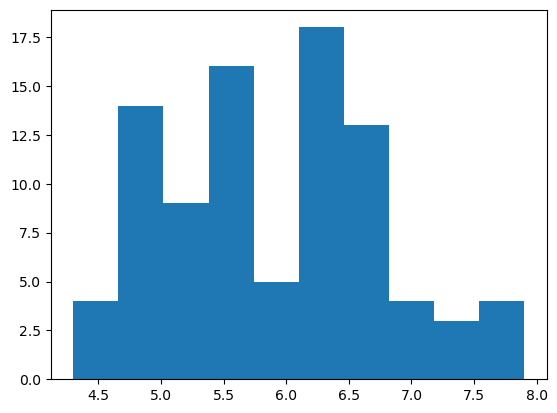

sepal_length


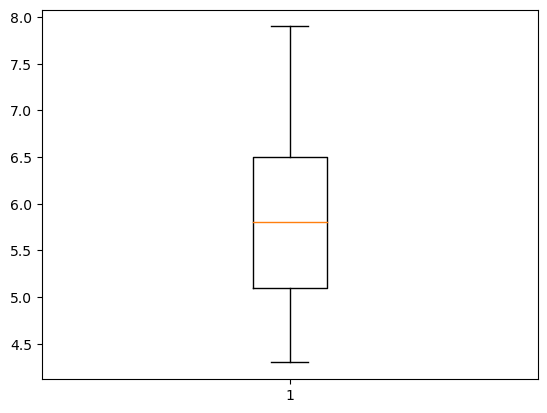

sepal_length statistics: 
count    90.000000
mean      5.894444
std       0.846720
min       4.300000
25%       5.100000
50%       5.800000
75%       6.500000
max       7.900000
Name: sepal_length, dtype: float64
sepal_width


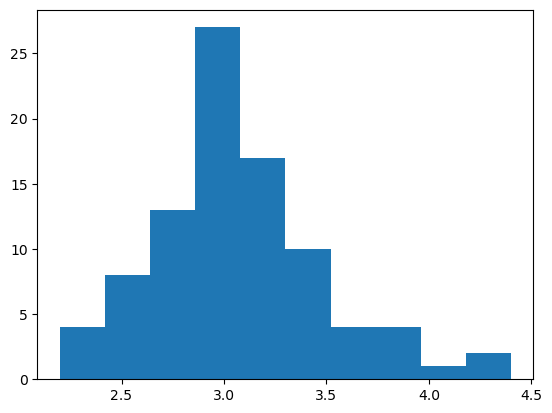

sepal_width


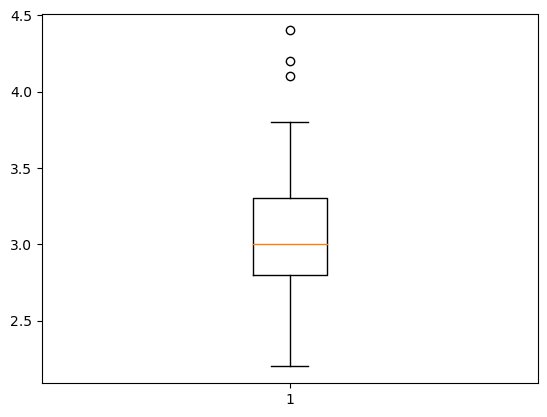

sepal_width statistics: 
count    90.000000
mean      3.076667
std       0.419751
min       2.200000
25%       2.800000
50%       3.000000
75%       3.300000
max       4.400000
Name: sepal_width, dtype: float64
petal_length


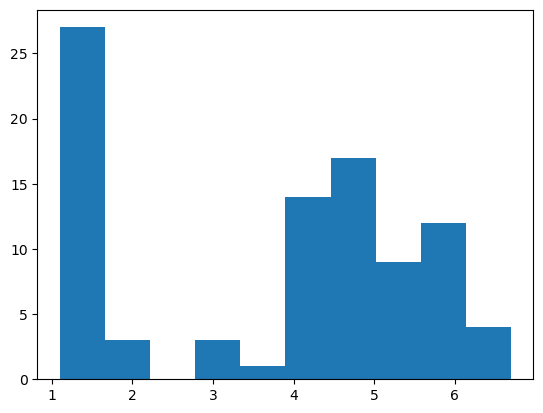

petal_length


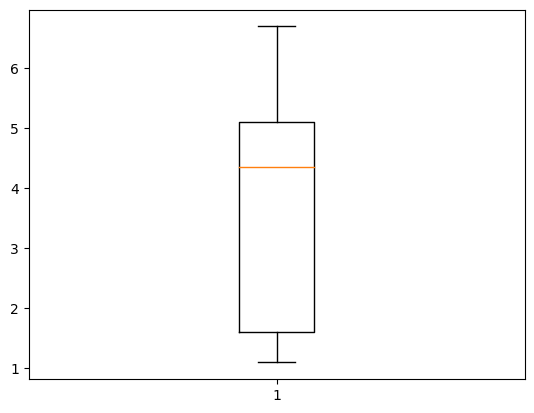

petal_length statistics: 
count    90.000000
mean      3.772222
std       1.776503
min       1.100000
25%       1.600000
50%       4.350000
75%       5.100000
max       6.700000
Name: petal_length, dtype: float64
petal_width


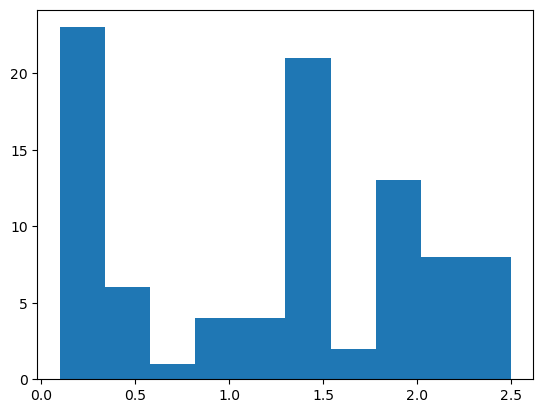

petal_width


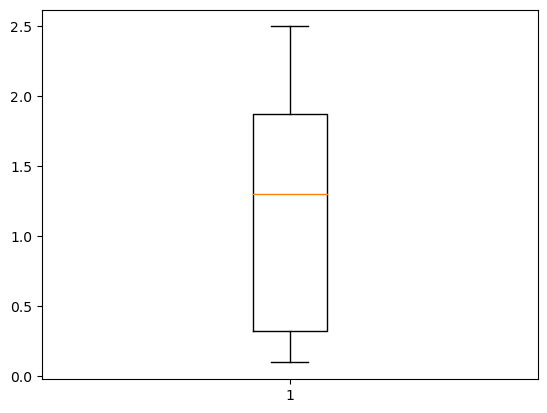

petal_width statistics: 
count    90.000000
mean      1.215556
std       0.772259
min       0.100000
25%       0.325000
50%       1.300000
75%       1.875000
max       2.500000
Name: petal_width, dtype: float64
versicolor


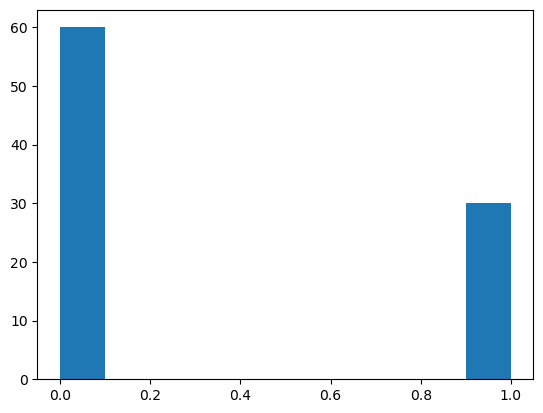

versicolor


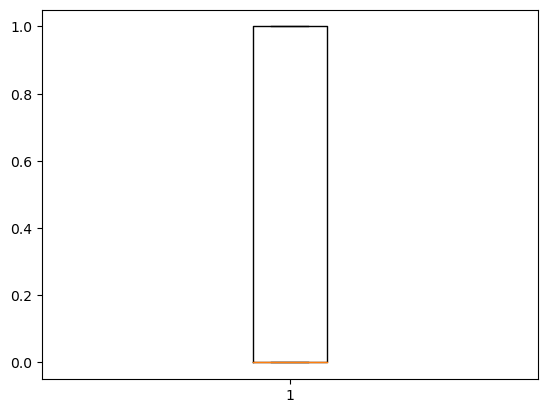

versicolor statistics: 
count    90.000000
mean      0.333333
std       0.474045
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: versicolor, dtype: float64


In [85]:
i = 2
while i <= 6:
    print(f'{column_names[i]}')
    plt.hist(iris_train.iloc[:, i])
    plt.show()
    print(f'{column_names[i]}')
    plt.boxplot(iris_train.iloc[:, i])
    plt.show()
    print(f'{column_names[i]} statistics: ')
    print(iris_train.iloc[:, i].describe())
    i += 1

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [86]:
iris_train.species.value_counts()

virginica     30
versicolor    30
setosa        30
Name: species, dtype: int64

<Axes: >

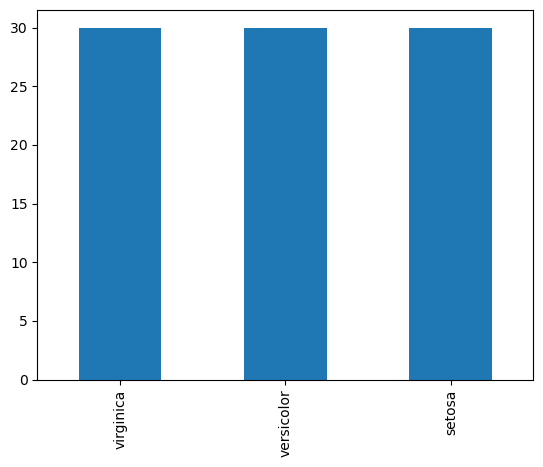

In [87]:
iris_train.species.value_counts().plot.bar()

Document takeaways & any actions.

Sepal length and width seems normally distributed or there seems to be no distinction between species while there seems to be some kind of deliniating factor with petal length and width

## Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

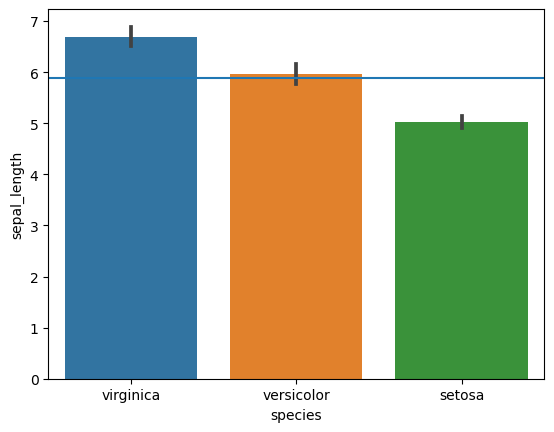

In [88]:
sns.barplot(x='species', y='sepal_length', data=iris_train)
plt.axhline(y=iris_train.sepal_length.mean()) #Try again on review

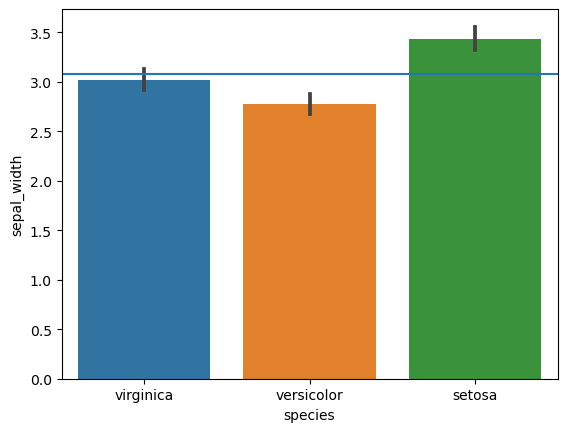

In [89]:
sns.barplot(x='species', y='sepal_width', data=iris_train)
plt.axhline(y=iris_train.sepal_width.mean())

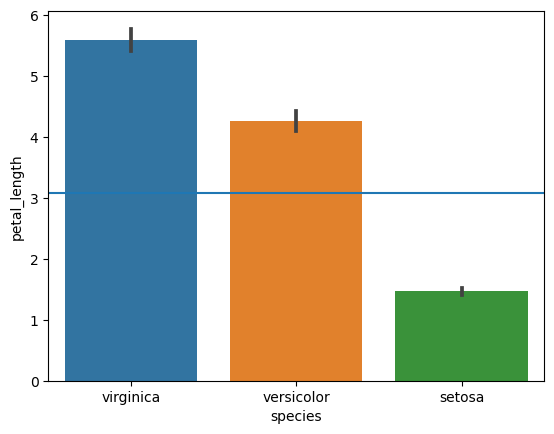

In [90]:
sns.barplot(x='species', y='petal_length', data=iris_train)
plt.axhline(y=iris_train.sepal_width.mean())

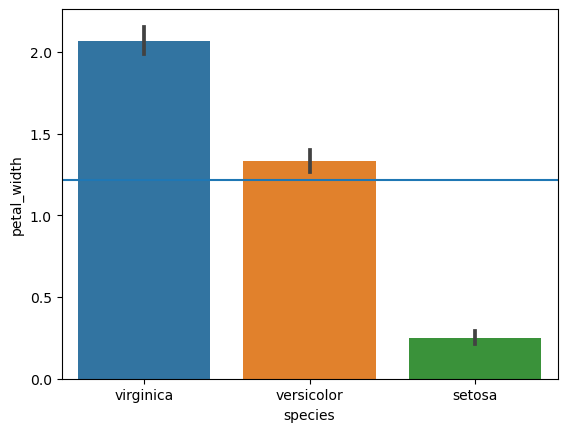

In [91]:
sns.barplot(x='species', y='petal_width', data=iris_train)
plt.axhline(y=iris_train.petal_width.mean())

In [92]:
# iris_train.plot.bar(x='species', y=mean(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']))

In [93]:
#. For each measurement type, compute the descriptive statistics for each species.

In [94]:
iris_train[iris_train.species == 'setosa'].describe()

Unnamed: 0  sepal_length  sepal_width  petal_length  petal_width  \
count   30.000000      30.00000    30.000000     30.000000    30.000000   
mean    27.800000       5.02000     3.430000      1.466667     0.250000   
std     14.240302       0.33876     0.367799      0.162594     0.122474   
min      0.000000       4.30000     3.000000      1.100000     0.100000   
25%     16.250000       4.82500     3.200000      1.400000     0.200000   
50%     30.000000       5.00000     3.400000      1.500000     0.200000   
75%     39.500000       5.20000     3.650000      1.575000     0.300000   
max     48.000000       5.70000     4.400000      1.900000     0.600000   

       versicolor  virginica  
count        30.0       30.0  
mean          0.0        0.0  
std           0.0        0.0  
min           0.0        0.0  
25%           0.0        0.0  
50%           0.0        0.0  
75%           0.0        0.0  
max           0.0        0.0

In [95]:
iris_train[iris_train.species == 'versicolor'].describe()

Unnamed: 0  sepal_length  sepal_width  petal_length  petal_width  \
count   30.000000     30.000000    30.000000     30.000000    30.000000   
mean    74.733333      5.966667     2.776667      4.263333     1.333333   
std     14.590817      0.547303     0.273777      0.488123     0.186313   
min     52.000000      4.900000     2.200000      3.000000     1.000000   
25%     63.500000      5.600000     2.600000      4.025000     1.225000   
50%     74.500000      5.950000     2.850000      4.350000     1.300000   
75%     88.750000      6.375000     3.000000      4.575000     1.500000   
max     98.000000      6.900000     3.300000      5.000000     1.700000   

       versicolor  virginica  
count        30.0       30.0  
mean          1.0        0.0  
std           0.0        0.0  
min           1.0        0.0  
25%           1.0        0.0  
50%           1.0        0.0  
75%           1.0        0.0  
max           1.0        0.0

In [96]:
iris_train[iris_train.species == 'virginica'].describe()

Unnamed: 0  sepal_length  sepal_width  petal_length  petal_width  \
count   30.000000     30.000000    30.000000     30.000000    30.000000   
mean   123.000000      6.696667     3.023333      5.586667     2.063333   
std     14.689898      0.569018     0.324498      0.516442     0.241380   
min    101.000000      5.700000     2.500000      4.800000     1.500000   
25%    111.250000      6.300000     2.800000      5.125000     1.900000   
50%    123.500000      6.500000     3.000000      5.600000     2.100000   
75%    132.750000      7.050000     3.175000      5.875000     2.275000   
max    148.000000      7.900000     3.800000      6.700000     2.500000   

       versicolor  virginica  
count        30.0       30.0  
mean          0.0        1.0  
std           0.0        0.0  
min           0.0        1.0  
25%           0.0        1.0  
50%           0.0        1.0  
75%           0.0        1.0  
max           0.0        1.0

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Hypotheses combined:
    
    Null Hyp: For randomly chosen flowers the probability of the metric (i.e petal_width) of the randomly chosen virginica flower will be greater than that metric for versicolor will be equal to the probability that said metric will be greater for versicolor than for virginica.
    Alt Hyp: The probability of the metric (i.e. petal width) for one species will be greater than the other.
    I will choose a p-value of .05

In [97]:
stats.mannwhitneyu(iris_train[iris_train.species == 'virginica'].petal_width, iris_train[iris_train.species == 'versicolor'].petal_width)

MannwhitneyuResult(statistic=894.0, pvalue=4.5054902783594904e-11)

There is sufficient evidence to reject the null.  There is a difference in petal widths.

In [98]:
stats.mannwhitneyu(iris_train[iris_train.species == 'virginica'].petal_length, iris_train[iris_train.species == 'versicolor'].petal_length)

MannwhitneyuResult(statistic=891.5, pvalue=6.734087238795413e-11)

There is sufficient evidence to reject the null.  There is a difference in petal widths.

In [99]:
stats.mannwhitneyu(iris_train[iris_train.species == 'virginica'].sepal_width, iris_train[iris_train.species == 'versicolor'].sepal_width)

MannwhitneyuResult(statistic=627.5, pvalue=0.008170149462921602)

There is not sufficient evidence to reject the null.  There doesn't seem to be a difference in sepal_widths.

In [100]:
stats.mannwhitneyu(iris_train[iris_train.species == 'virginica'].sepal_length, iris_train[iris_train.species == 'versicolor'].sepal_length)

MannwhitneyuResult(statistic=732.0, pvalue=3.0608979424863555e-05)

Document takeaways & any actions.

There is sufficient evidence to reject the null.  There is a difference in sepal lengths.

In [101]:
iris_train

Unnamed: 0     species  sepal_length  sepal_width  petal_length  \
113         113   virginica           5.7          2.5           5.0   
94           94  versicolor           5.6          2.7           4.2   
95           95  versicolor           5.7          3.0           4.2   
13           13      setosa           4.3          3.0           1.1   
84           84  versicolor           5.4          3.0           4.5   
33           33      setosa           5.5          4.2           1.4   
12           12      setosa           4.8          3.0           1.4   
79           79  versicolor           5.7          2.6           3.5   
32           32      setosa           5.2          4.1           1.5   
25           25      setosa           5.0          3.0           1.6   
44           44      setosa           5.1          3.8           1.9   
72           72  versicolor           6.3          2.5           4.9   
61           61  versicolor           5.9          3.0           4.2   
67           67  versicolor           5.8          2.7           4.1   
123         123   virginica           6.3          2.7           4.9   
107         107   virginica           7.3          2.9           6.3   
54           54  versicolor           6.5          2.8           4.6   
131         131   virginica           7.9          3.8           6.4   
45           45      setosa           4.8          3.0           1.4   
58           58  versicolor           6.6          2.9           4.6   
29           29      setosa           4.7          3.2           1.6   
98           98  versicolor           5.1          2.5           3.0   
53           53  versicolor           5.5          2.3           4.0   
48           48      setosa           5.3          3.7           1.5   
141         141   virginica           6.9          3.1           5.1   
71           71  versicolor           6.1          2.8           4.0   
28           28      setosa           5.2          3.4           1.4   
68           68  versicolor           6.2          2.2           4.5   
26           26      setosa           5.0          3.4           1.6   
23           23      setosa           5.1          3.3           1.7   
120         120   virginica           6.9          3.2           5.7   
132         132   virginica           6.4          2.8           5.6   
0             0      setosa           5.1          3.5           1.4   
42           42      setosa           4.4          3.2           1.3   
20           20      setosa           5.4          3.4           1.7   
116         116   virginica           6.5          3.0           5.5   
103         103   virginica           6.3          2.9           5.6   
126         126   virginica           6.2          2.8           4.8   
74           74  versicolor           6.4          2.9           4.3   
128         128   virginica           6.4          2.8           5.6   
31           31      setosa           5.4          3.4           1.5   
57           57  versicolor           4.9          2.4           3.3   
97           97  versicolor           6.2          2.9           4.3   
21           21      setosa           5.1          3.7           1.5   
52           52  versicolor           6.9          3.1           4.9   
78           78  versicolor           6.0          2.9           4.5   
47           47      setosa           4.6          3.2           1.4   
7             7      setosa           5.0          3.4           1.5   
92           92  versicolor           5.8          2.6           4.0   
93           93  versicolor           5.0          2.3           3.3   
111         111   virginica           6.4          2.7           5.3   
34           34      setosa           4.9          3.1           1.5   
144         144   virginica           6.7          3.3           5.7   
15           15      setosa           5.7          4.4           1.5   
135         135   virginica           7.7    

## Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

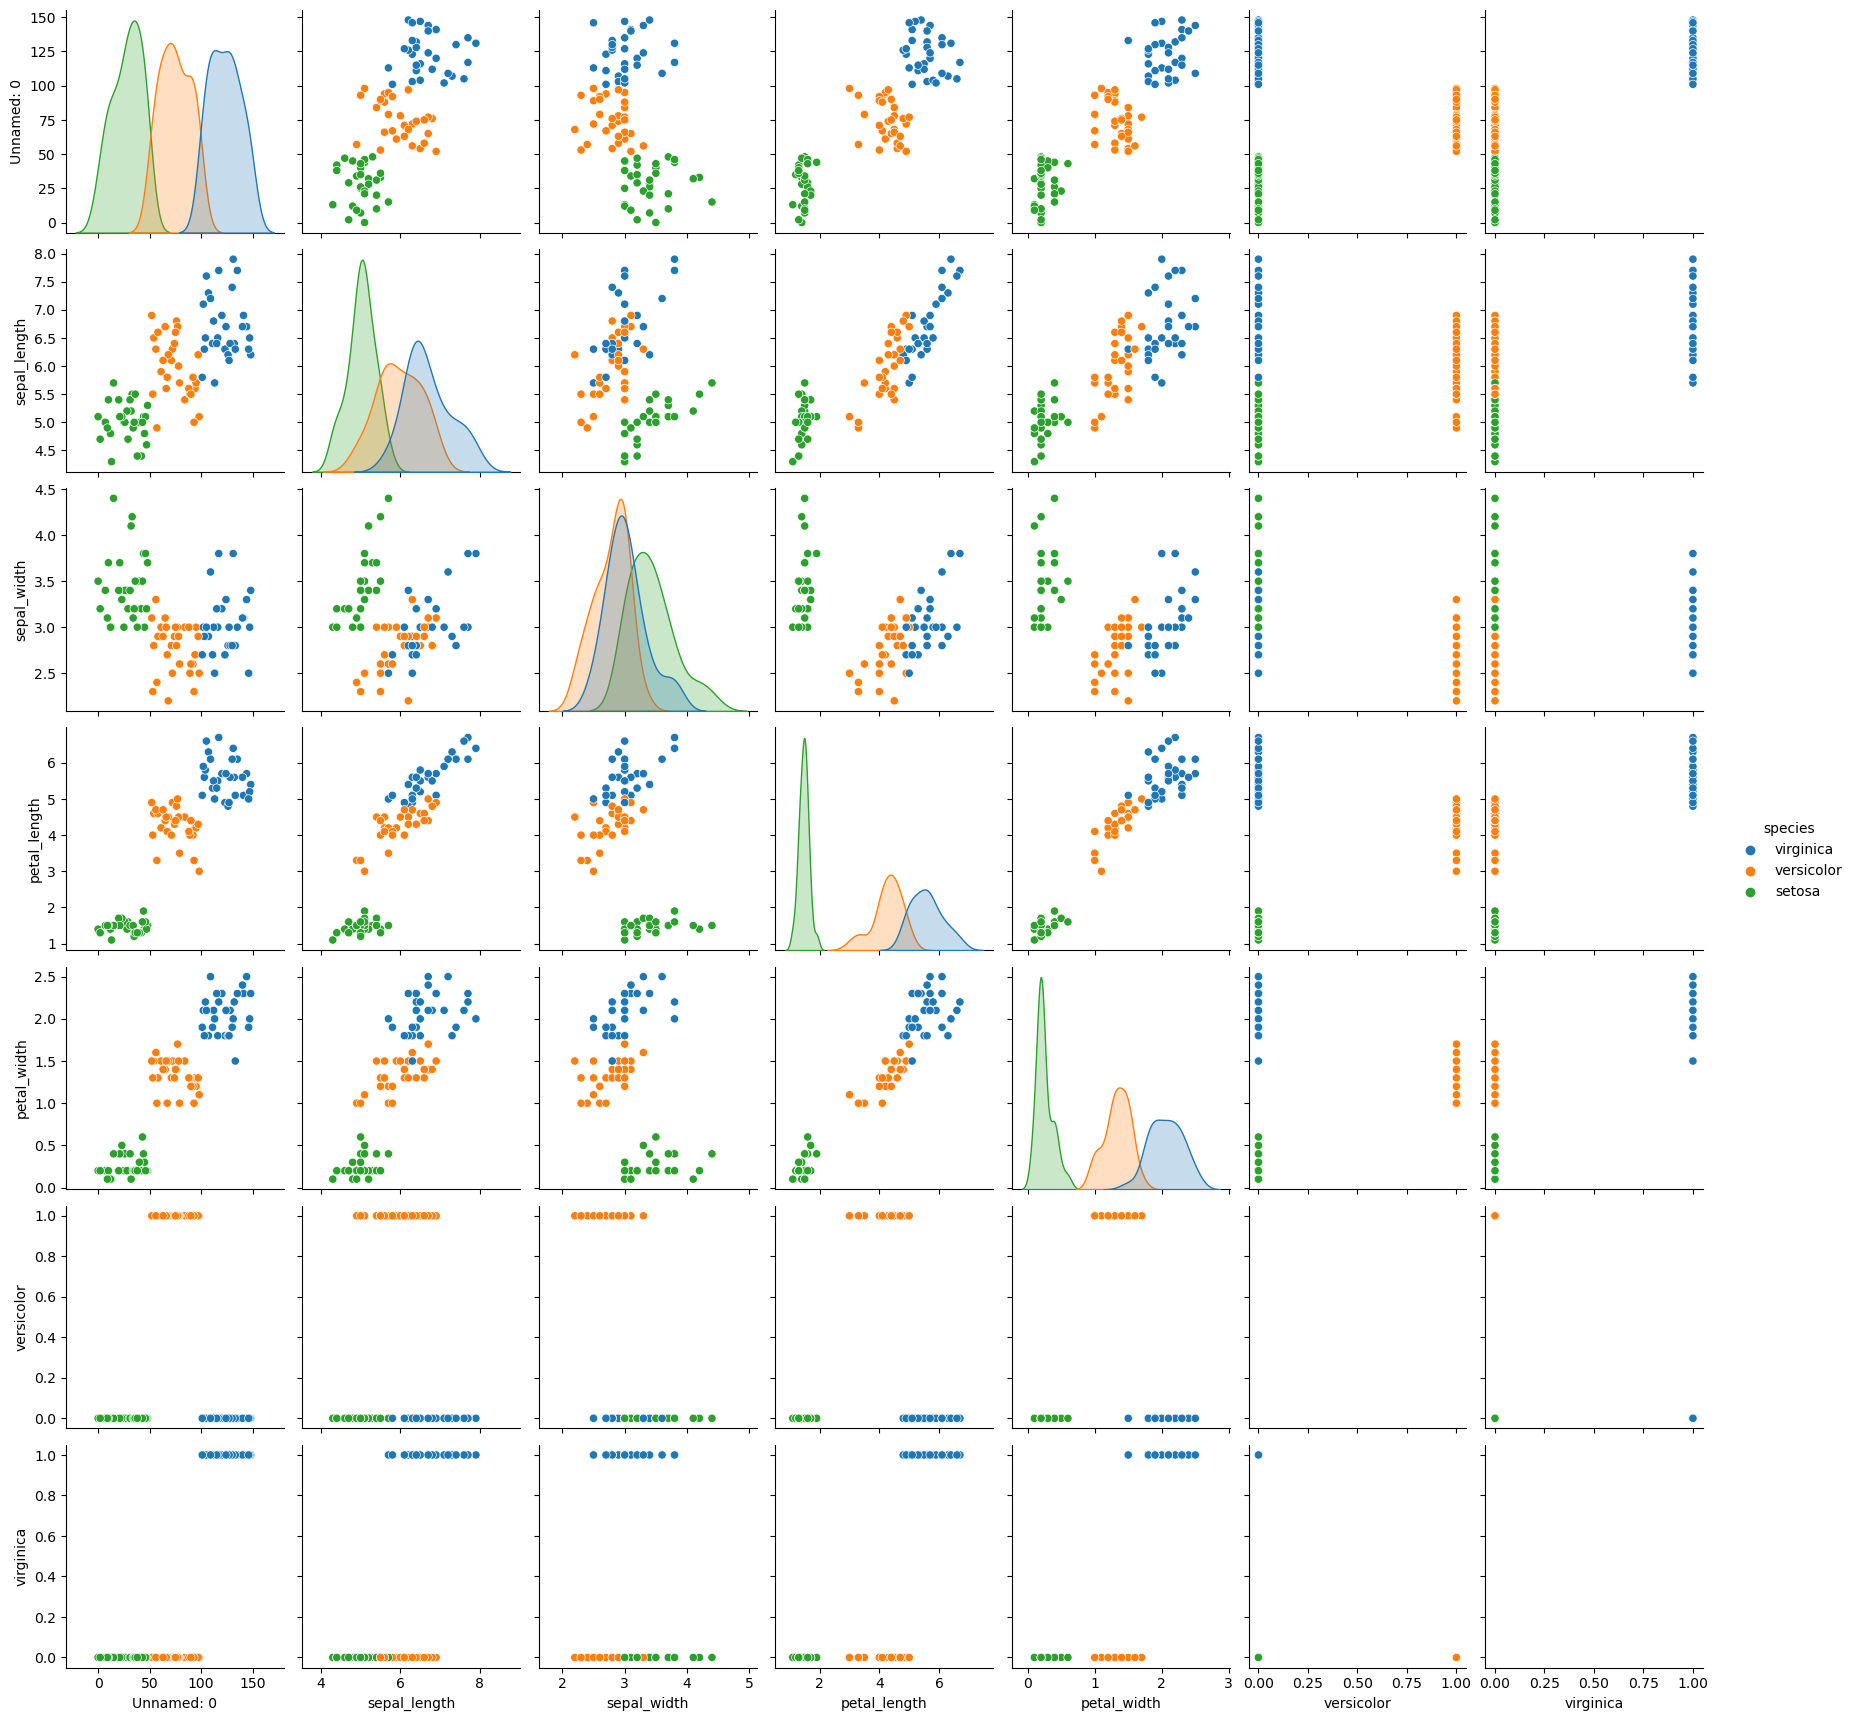

In [102]:
sns.pairplot(iris_train, hue='species')

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

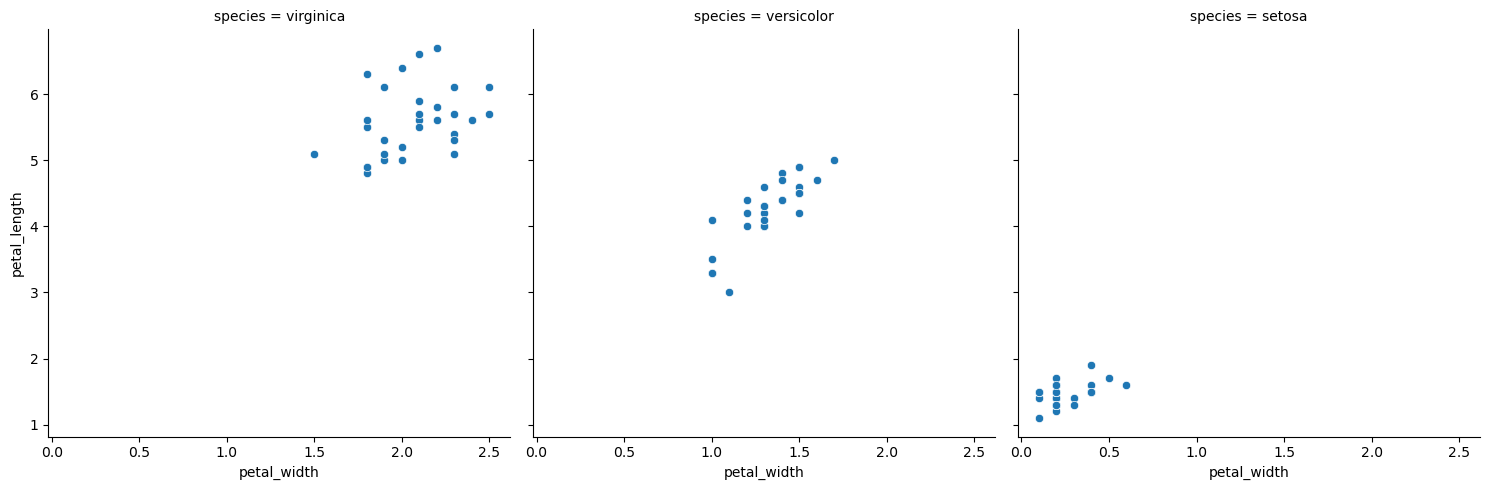

In [103]:
sns.relplot(iris_train, x='petal_width', y='petal_length', col='species')

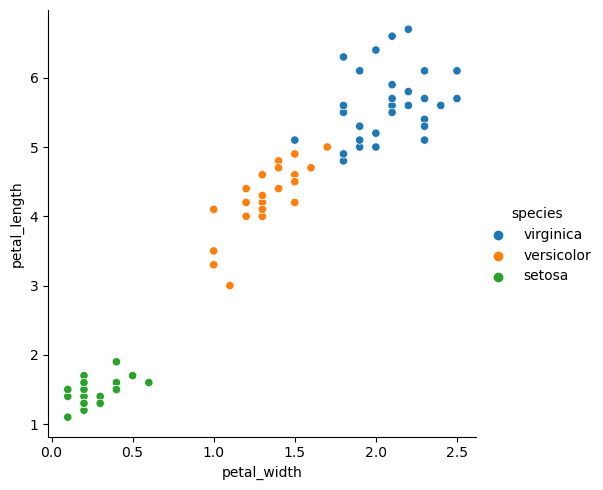

In [104]:
sns.relplot(iris_train, x='petal_width', y='petal_length', hue='species')

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [105]:
iris_train_melt = iris_train.melt(id_vars=['Unnamed: 0','species', 'virginica', 'versicolor'], var_name='all_dimensions', value_name='measurements')
iris_train_melt

Unnamed: 0     species  virginica  versicolor all_dimensions  \
0           113   virginica          1           0   sepal_length   
1            94  versicolor          0           1   sepal_length   
2            95  versicolor          0           1   sepal_length   
3            13      setosa          0           0   sepal_length   
4            84  versicolor          0           1   sepal_length   
..          ...         ...        ...         ...            ...   
355         101   virginica          1           0    petal_width   
356          63  versicolor          0           1    petal_width   
357           2      setosa          0           0    petal_width   
358          38      setosa          0           0    petal_width   
359         124   virginica          1           0    petal_width   

     measurements  
0             5.7  
1             5.6  
2             5.7  
3             4.3  
4             5.4  
..            ...  
355           1.9  
356           1.4  
357           0.2  
358           0.2  
359           2.1  

[360 rows x 6 columns]

/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='all_dimensions', ylabel='measurements'>

/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


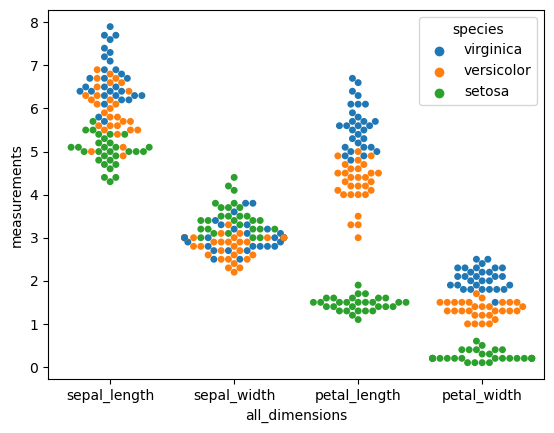

In [106]:
sns.swarmplot(iris_train_melt, x='all_dimensions', y='measurements', hue='species')

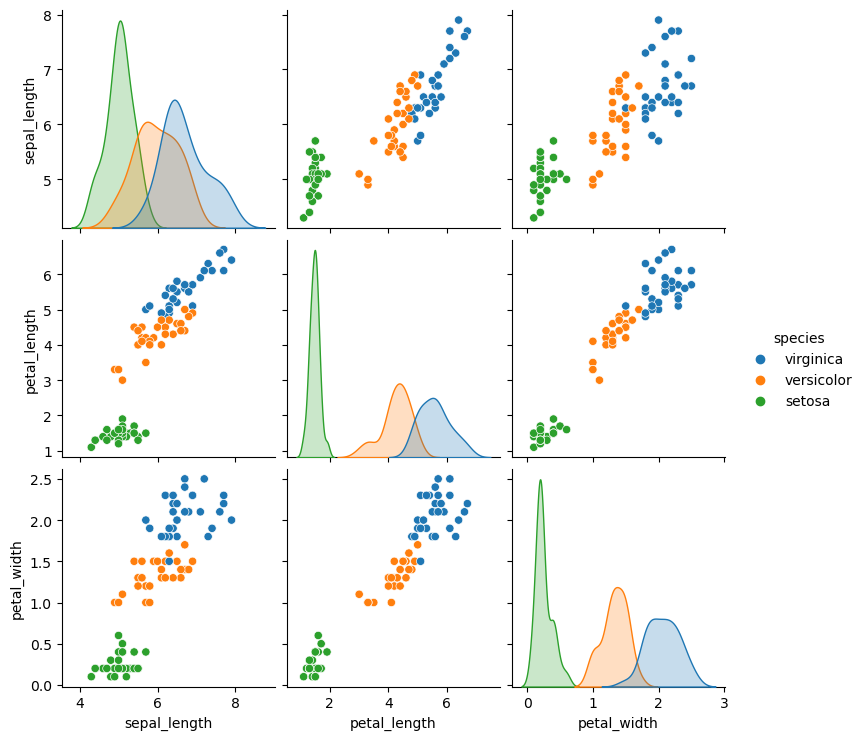

In [107]:
three_d = iris_train[['sepal_length', 'petal_length', 'petal_width', 'species']]
sns.pairplot(three_d, hue='species')

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

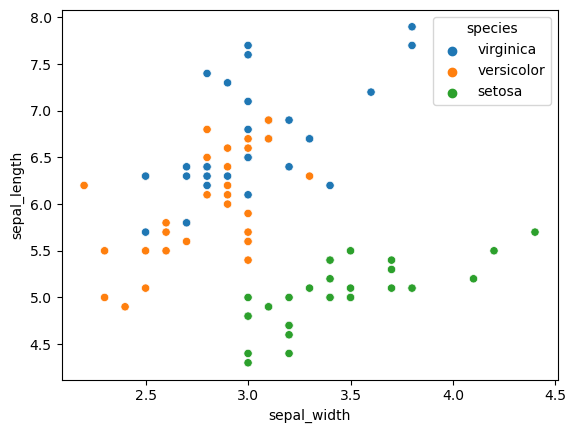

In [108]:
sns.scatterplot(iris_train, x='sepal_width', y='sepal_length', hue='species')

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Even though there is a clear distinction of the sizes of species which can be confirmed by ANOVA...is the petal_width to petal_length ratio consistent across species.

In [109]:
stats.pearsonr(x=iris_train.petal_width, y=iris_train.petal_length)

PearsonRResult(statistic=0.9694346737363541, pvalue=1.7488193726783656e-55)

In [110]:
setosa = iris_train[iris_train.species == 'setosa']
setosa

Unnamed: 0 species  sepal_length  sepal_width  petal_length  petal_width  \
13          13  setosa           4.3          3.0           1.1          0.1   
33          33  setosa           5.5          4.2           1.4          0.2   
12          12  setosa           4.8          3.0           1.4          0.1   
32          32  setosa           5.2          4.1           1.5          0.1   
25          25  setosa           5.0          3.0           1.6          0.2   
44          44  setosa           5.1          3.8           1.9          0.4   
45          45  setosa           4.8          3.0           1.4          0.3   
29          29  setosa           4.7          3.2           1.6          0.2   
48          48  setosa           5.3          3.7           1.5          0.2   
28          28  setosa           5.2          3.4           1.4          0.2   
26          26  setosa           5.0          3.4           1.6          0.4   
23          23  setosa           5.1          3.3           1.7          0.5   
0            0  setosa           5.1          3.5           1.4          0.2   
42          42  setosa           4.4          3.2           1.3          0.2   
20          20  setosa           5.4          3.4           1.7          0.2   
31          31  setosa           5.4          3.4           1.5          0.4   
21          21  setosa           5.1          3.7           1.5          0.4   
47          47  setosa           4.6          3.2           1.4          0.2   
7            7  setosa           5.0          3.4           1.5          0.2   
34          34  setosa           4.9          3.1           1.5          0.2   
15          15  setosa           5.7          4.4           1.5          0.4   
10          10  setosa           5.4          3.7           1.5          0.2   
40          40  setosa           5.0          3.5           1.3          0.3   
9            9  setosa           4.9          3.1           1.5          0.1   
46          46  setosa           5.1          3.8           1.6          0.2   
35          35  setosa           5.0          3.2           1.2          0.2   
43          43  setosa           5.0          3.5           1.6          0.6   
36          36  setosa           5.5          3.5           1.3          0.2   
2            2  setosa           4.7          3.2           1.3          0.2   
38          38  setosa           4.4          3.0           1.3          0.2   

    versicolor  virginica  
13           0          0  
33           0          0  
12           0          0  
32           0          0  
25           0          0  
44           0          0  
45           0          0  
29           0          0  
48           0          0  
28           0          0  
26           0          0  
23           0          0  
0            0          0  
42           0          0  
20           0          0  
31           0          0  
21           0          0  
47           0          0  
7            0          0  
34           0          0  
15           0          0  
10           0          0  
40           0          0  
9            0          0  
46           0          0  
35           0          0  
43           0          0  
36           0          0  
2            0          0  
38           0          0

In [111]:
stats.pearsonr(x=setosa.petal_width, y=setosa.petal_length)

PearsonRResult(statistic=0.4675368484383624, pvalue=0.009183969259650728)

In [112]:
virginica = iris_train[iris_train.species == 'virginica']
virginica

Unnamed: 0    species  sepal_length  sepal_width  petal_length  \
113         113  virginica           5.7          2.5           5.0   
123         123  virginica           6.3          2.7           4.9   
107         107  virginica           7.3          2.9           6.3   
131         131  virginica           7.9          3.8           6.4   
141         141  virginica           6.9          3.1           5.1   
120         120  virginica           6.9          3.2           5.7   
132         132  virginica           6.4          2.8           5.6   
116         116  virginica           6.5          3.0           5.5   
103         103  virginica           6.3          2.9           5.6   
126         126  virginica           6.2          2.8           4.8   
128         128  virginica           6.4          2.8           5.6   
111         111  virginica           6.4          2.7           5.3   
144         144  virginica           6.7          3.3           5.7   
135         135  virginica           7.7          3.0           6.1   
140         140  virginica           6.7          3.1           5.6   
148         148  virginica           6.2          3.4           5.4   
147         147  virginica           6.5          3.0           5.2   
117         117  virginica           7.7          3.8           6.7   
133         133  virginica           6.3          2.8           5.1   
146         146  virginica           6.3          2.5           5.0   
104         104  virginica           6.5          3.0           5.8   
112         112  virginica           6.8          3.0           5.5   
115         115  virginica           6.4          3.2           5.3   
102         102  virginica           7.1          3.0           5.9   
105         105  virginica           7.6          3.0           6.6   
130         130  virginica           7.4          2.8           6.1   
127         127  virginica           6.1          3.0           4.9   
109         109  virginica           7.2          3.6           6.1   
101         101  virginica           5.8          2.7           5.1   
124         124  virginica           6.7          3.3           5.7   

     petal_width  versicolor  virginica  
113          2.0           0          1  
123          1.8           0          1  
107          1.8           0          1  
131          2.0           0          1  
141          2.3           0          1  
120          2.3           0          1  
132          2.2           0          1  
116          1.8           0          1  
103          1.8           0          1  
126          1.8           0          1  
128          2.1           0          1  
111          1.9           0          1  
144          2.5           0          1  
135          2.3           0          1  
140          2.4           0          1  
148          2.3           0          1  
147          2.0           0          1  
117          2.2           0          1  
133          1.5           0          1  
146          1.9           0          1  
104          2.2           0          1  
112          2.1           0          1  
115          2.3           0          1  
102          2.1           0          1  
105          2.1           0          1  
130          1.9           0          1  
127          1.8           0          1  
109          2.5           0          1  
101          1.9           0          1  
124          2.1           0          1

In [113]:
stats.pearsonr(x=virginica.petal_width, y=virginica.petal_length)

PearsonRResult(statistic=0.34724639175636907, pvalue=0.06009280780378977)

In [114]:
versicolor = iris_train[iris_train['species'] == 'versicolor']
versicolor

Unnamed: 0     species  sepal_length  sepal_width  petal_length  \
94          94  versicolor           5.6          2.7           4.2   
95          95  versicolor           5.7          3.0           4.2   
84          84  versicolor           5.4          3.0           4.5   
79          79  versicolor           5.7          2.6           3.5   
72          72  versicolor           6.3          2.5           4.9   
61          61  versicolor           5.9          3.0           4.2   
67          67  versicolor           5.8          2.7           4.1   
54          54  versicolor           6.5          2.8           4.6   
58          58  versicolor           6.6          2.9           4.6   
98          98  versicolor           5.1          2.5           3.0   
53          53  versicolor           5.5          2.3           4.0   
71          71  versicolor           6.1          2.8           4.0   
68          68  versicolor           6.2          2.2           4.5   
74          74  versicolor           6.4          2.9           4.3   
57          57  versicolor           4.9          2.4           3.3   
97          97  versicolor           6.2          2.9           4.3   
52          52  versicolor           6.9          3.1           4.9   
78          78  versicolor           6.0          2.9           4.5   
92          92  versicolor           5.8          2.6           4.0   
93          93  versicolor           5.0          2.3           3.3   
65          65  versicolor           6.7          3.1           4.4   
76          76  versicolor           6.8          2.8           4.8   
89          89  versicolor           5.5          2.5           4.0   
77          77  versicolor           6.7          3.0           5.0   
66          66  versicolor           5.6          3.0           4.5   
88          88  versicolor           5.6          3.0           4.1   
75          75  versicolor           6.6          3.0           4.4   
56          56  versicolor           6.3          3.3           4.7   
90          90  versicolor           5.5          2.6           4.4   
63          63  versicolor           6.1          2.9           4.7   

    petal_width  versicolor  virginica  
94          1.3           1          0  
95          1.2           1          0  
84          1.5           1          0  
79          1.0           1          0  
72          1.5           1          0  
61          1.5           1          0  
67          1.0           1          0  
54          1.5           1          0  
58          1.3           1          0  
98          1.1           1          0  
53          1.3           1          0  
71          1.3           1          0  
68          1.5           1          0  
74          1.3           1          0  
57          1.0           1          0  
97          1.3           1          0  
52          1.5           1          0  
78          1.5           1          0  
92          1.2           1          0  
93          1.0           1          0  
65          1.4           1          0  
76          1.4           1          0  
89          1.3           1          0  
77          1.7           1          0  
66          1.5           1          0  
88          1.3           1          0  
75          1.4           1          0  
56          1.6           1          0  
90          1.2           1          0  
63          1.4           1          0

In [115]:
stats.pearsonr(x=versicolor.petal_width, y=versicolor.petal_length)

PearsonRResult(statistic=0.8253165119173206, pvalue=2.0025212395473255e-08)

### As a group, there seems to be a strong correlation between petal width and petal length but as individual species not so much.  So I am going to run an ANOVA on the variables by creating a new column that shows the ratio of the two.

In [116]:
iris['ratio'] = iris.petal_length / iris.petal_width
iris

Unnamed: 0     species  sepal_length  sepal_width  petal_length  \
0             0      setosa           5.1          3.5           1.4   
1             1      setosa           4.9          3.0           1.4   
2             2      setosa           4.7          3.2           1.3   
3             3      setosa           4.6          3.1           1.5   
4             4      setosa           5.0          3.6           1.4   
5             5      setosa           5.4          3.9           1.7   
6             6      setosa           4.6          3.4           1.4   
7             7      setosa           5.0          3.4           1.5   
8             8      setosa           4.4          2.9           1.4   
9             9      setosa           4.9          3.1           1.5   
10           10      setosa           5.4          3.7           1.5   
11           11      setosa           4.8          3.4           1.6   
12           12      setosa           4.8          3.0           1.4   
13           13      setosa           4.3          3.0           1.1   
14           14      setosa           5.8          4.0           1.2   
15           15      setosa           5.7          4.4           1.5   
16           16      setosa           5.4          3.9           1.3   
17           17      setosa           5.1          3.5           1.4   
18           18      setosa           5.7          3.8           1.7   
19           19      setosa           5.1          3.8           1.5   
20           20      setosa           5.4          3.4           1.7   
21           21      setosa           5.1          3.7           1.5   
22           22      setosa           4.6          3.6           1.0   
23           23      setosa           5.1          3.3           1.7   
24           24      setosa           4.8          3.4           1.9   
25           25      setosa           5.0          3.0           1.6   
26           26      setosa           5.0          3.4           1.6   
27           27      setosa           5.2          3.5           1.5   
28           28      setosa           5.2          3.4           1.4   
29           29      setosa           4.7          3.2           1.6   
30           30      setosa           4.8          3.1           1.6   
31           31      setosa           5.4          3.4           1.5   
32           32      setosa           5.2          4.1           1.5   
33           33      setosa           5.5          4.2           1.4   
34           34      setosa           4.9          3.1           1.5   
35           35      setosa           5.0          3.2           1.2   
36           36      setosa           5.5          3.5           1.3   
37           37      setosa           4.9          3.6           1.4   
38           38      setosa           4.4          3.0           1.3   
39           39      setosa           5.1          3.4           1.5   
40           40      setosa           5.0          3.5           1.3   
41           41      setosa           4.5          2.3           1.3   
42           42      setosa           4.4          3.2           1.3   
43           43      setosa           5.0          3.5           1.6   
44           44      setosa           5.1          3.8           1.9   
45           45      setosa           4.8          3.0           1.4   
46           46      setosa           5.1          3.8           1.6   
47           47      setosa           4.6          3.2           1.4   
48           48      setosa           5.3          3.7           1.5   
49           49      setosa           5.0          3.3           1.4   
50           50  versicolor           7.0          3.2           4.7   
51           51  versicolor           6.4          3.2           4.5   
52           52  versicolor           6.9          3.1           4.9   
53           53  versicolor           5.5          2.3           4.0   
54           54  versicolor           6.5    

In [117]:
iris_train, iris_validate, iris_test = split_data(iris, 'species')

In [118]:
iris = iris.drop(columns=['Unnamed: 0', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'versicolor', 'virginica'])

In [119]:
setosa = iris[:50]['ratio']
setosa
    

0      7.000000
1      7.000000
2      6.500000
3      7.500000
4      7.000000
5      4.250000
6      4.666667
7      7.500000
8      7.000000
9     15.000000
10     7.500000
11     8.000000
12    14.000000
13    11.000000
14     6.000000
15     3.750000
16     3.250000
17     4.666667
18     5.666667
19     5.000000
20     8.500000
21     3.750000
22     5.000000
23     3.400000
24     9.500000
25     8.000000
26     4.000000
27     7.500000
28     7.000000
29     8.000000
30     8.000000
31     3.750000
32    15.000000
33     7.000000
34     7.500000
35     6.000000
36     6.500000
37    14.000000
38     6.500000
39     7.500000
40     4.333333
41     4.333333
42     6.500000
43     2.666667
44     4.750000
45     4.666667
46     8.000000
47     7.000000
48     7.500000
49     7.000000
Name: ratio, dtype: float64

In [120]:
versicolor = iris[51:100]['ratio']
versicolor

51    3.000000
52    3.266667
53    3.076923
54    3.066667
55    3.461538
56    2.937500
57    3.300000
58    3.538462
59    2.785714
60    3.500000
61    2.800000
62    4.000000
63    3.357143
64    2.769231
65    3.142857
66    3.000000
67    4.100000
68    3.000000
69    3.545455
70    2.666667
71    3.076923
72    3.266667
73    3.916667
74    3.307692
75    3.142857
76    3.428571
77    2.941176
78    3.000000
79    3.500000
80    3.454545
81    3.700000
82    3.250000
83    3.187500
84    3.000000
85    2.812500
86    3.133333
87    3.384615
88    3.153846
89    3.076923
90    3.666667
91    3.285714
92    3.333333
93    3.300000
94    3.230769
95    3.500000
96    3.230769
97    3.307692
98    2.727273
99    3.153846
Name: ratio, dtype: float64

In [121]:
virginica = iris[101:149]['ratio']
virginica

101    2.684211
102    2.809524
103    3.111111
104    2.636364
105    3.142857
106    2.647059
107    3.500000
108    3.222222
109    2.440000
110    2.550000
111    2.789474
112    2.619048
113    2.500000
114    2.125000
115    2.304348
116    3.055556
117    3.045455
118    3.000000
119    3.333333
120    2.478261
121    2.450000
122    3.350000
123    2.722222
124    2.714286
125    3.333333
126    2.666667
127    2.722222
128    2.666667
129    3.625000
130    3.210526
131    3.200000
132    2.545455
133    3.400000
134    4.000000
135    2.652174
136    2.333333
137    3.055556
138    2.666667
139    2.571429
140    2.333333
141    2.217391
142    2.684211
143    2.565217
144    2.280000
145    2.260870
146    2.631579
147    2.600000
148    2.347826
Name: ratio, dtype: float64

ANOVA Null Hyp:
In terms of petal length to width ratio these species are the same
Alt Hyp:  They are in fact different in this metric
\alpha < 0.05

In [122]:
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=88.18764496660982, pvalue=9.877579891140418e-26)

Document takeaways and any actions.

There is sufficient evidence here to reject the null hypothesis and state in terms of petal to width ratio these populations are different despite the high correlation seen with the pearson test.  Therefore taking a correlation of the three groups together as above and finding a high correlation and then separating them into their individual correlations illustrates the importance of conditionality when doing these analyses.  A pitfall to avoid in the future!!!


# Part II - Titanic 

Explore your titanic dataset more completely.

In [123]:
titanic_train.describe()

Unnamed: 0  passenger_id    survived      pclass       sibsp  \
count  534.000000    534.000000  534.000000  534.000000  534.000000   
mean   457.666667    457.666667    0.383895    2.299625    0.556180   
std    254.700047    254.700047    0.486789    0.837736    1.144212   
min      1.000000      1.000000    0.000000    1.000000    0.000000   
25%    239.500000    239.500000    0.000000    2.000000    0.000000   
50%    453.000000    453.000000    0.000000    3.000000    0.000000   
75%    684.750000    684.750000    1.000000    3.000000    1.000000   
max    890.000000    890.000000    1.000000    3.000000    8.000000   

            parch        fare      alone    sex_male  embark_town_Queenstown  \
count  534.000000  534.000000  534.00000  534.000000              534.000000   
mean     0.432584   32.232318    0.58427    0.659176                0.069288   
std      0.858762   45.011823    0.49331    0.474431                0.254182   
min      0.000000    0.000000    0.00000    0.000000                0.000000   
25%      0.000000    8.050000    0.00000    0.000000                0.000000   
50%      0.000000   15.500000    1.00000    1.000000                0.000000   
75%      1.000000   31.359375    1.00000    1.000000                0.000000   
max      5.000000  512.329200    1.00000    1.000000                1.000000   

       embark_town_Southampton  
count               534.000000  
mean                  0.724719  
std                   0.447075  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   1.000000  
max                   1.000000

In [124]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 391 to 427
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               534 non-null    int64  
 1   passenger_id             534 non-null    int64  
 2   survived                 534 non-null    int64  
 3   pclass                   534 non-null    int64  
 4   sex                      534 non-null    object 
 5   sibsp                    534 non-null    int64  
 6   parch                    534 non-null    int64  
 7   fare                     534 non-null    float64
 8   embark_town              533 non-null    object 
 9   alone                    534 non-null    int64  
 10  sex_male                 534 non-null    uint8  
 11  embark_town_Queenstown   534 non-null    uint8  
 12  embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(7), object(2), uint8(3)
memory usage: 47.5+ KB


In [125]:
numeric = []
non_numeric = []
for col in titanic_train:
    if titanic_train[col].dtype != 'object':
        numeric.append(col)
    else: 
        non_numeric.append(col)
non_numeric

['sex', 'embark_town']

Determine drivers of the target variable

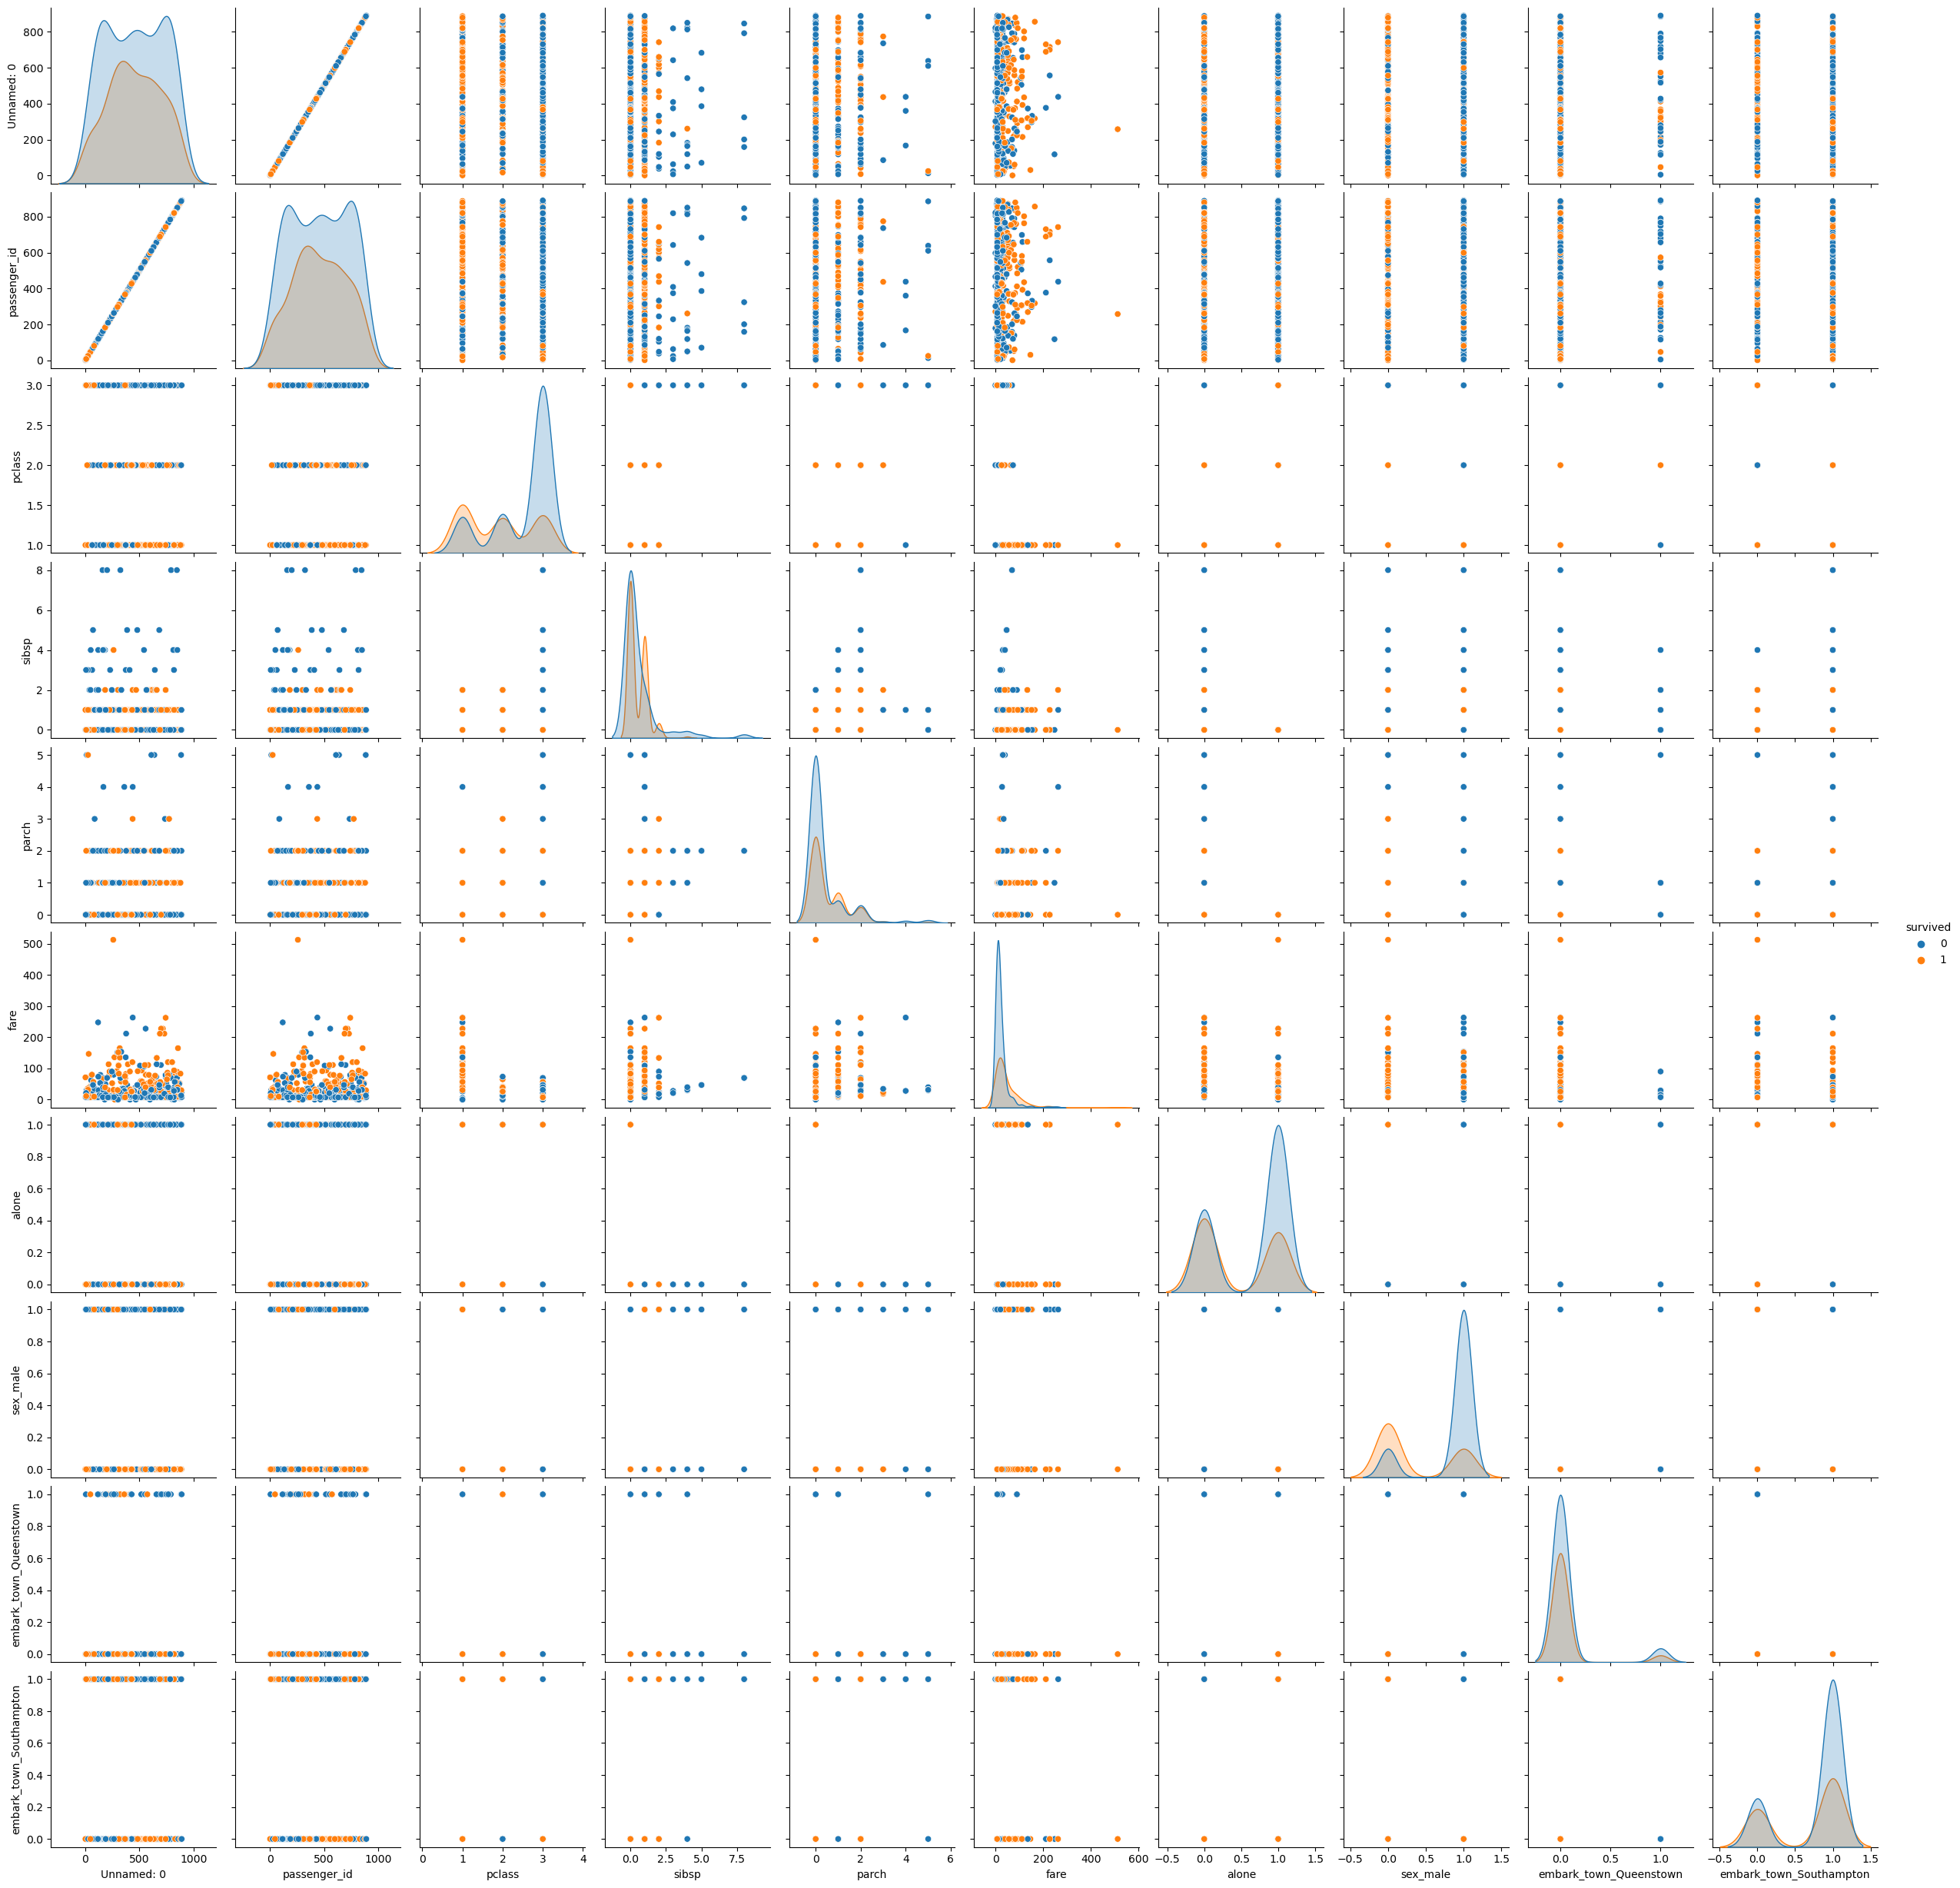

In [126]:
truncated_titanic = titanic_train[numeric]

sns.pairplot(truncated_titanic, hue='survived')

In [127]:
#Other ways from lecture:
# #get string columns
# str_col = df.columns [df.dtypes == 'object']
# str_col

# #find numeric columns
# num_col = df.select_dtypes(include='number').columns
# num_col

titanic_train.sex
male      352
female    182
Name: sex, dtype: int64
male      0.659176
female    0.340824
Name: sex, dtype: float64


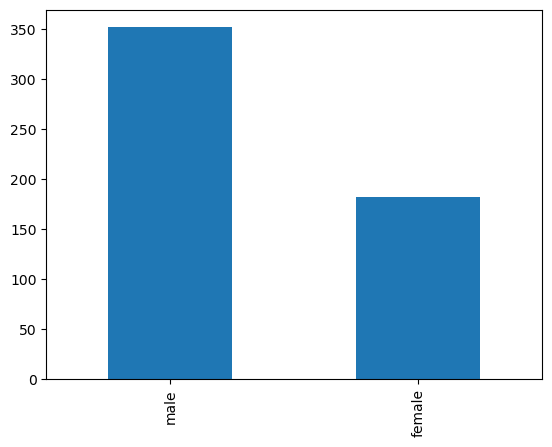

titanic_train.embark_town
Southampton    387
Cherbourg      109
Queenstown      37
Name: embark_town, dtype: int64
Southampton    0.726079
Cherbourg      0.204503
Queenstown     0.069418
Name: embark_town, dtype: float64


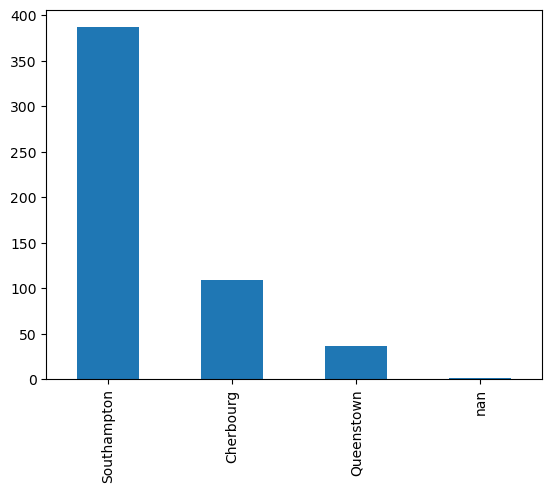

In [128]:

for col in non_numeric:
    print(f'titanic_train.{col}')
    print(titanic_train[col].value_counts())
    print(titanic_train[col].value_counts(normalize=True))
    titanic_train[col].value_counts(dropna=False).plot.bar()
    plt.show()
    #sns.barplot(titanic_train[col], hue=titanic_train['survived'])

Determine if certain columns should be dropped

In [129]:
titanic_train = titanic_train.drop(['Unnamed: 0', 'passenger_id', 'sex', 'embark_town'], axis=1)

In [130]:
titanic_train

survived  pclass  sibsp  parch      fare  alone  sex_male  \
391         1       3      0      0    7.7958      1         1   
11          1       1      0      0   26.5500      1         0   
258         1       1      0      0  512.3292      1         0   
405         0       2      1      0   21.0000      0         1   
736         0       3      1      3   34.3750      0         0   
..        ...     ...    ...    ...       ...    ...       ...   
7           0       3      3      1   21.0750      0         1   
8           1       3      0      2   11.1333      0         0   
367         1       3      0      0    7.2292      1         0   
610         0       3      1      5   31.2750      0         0   
427         1       2      0      0   26.0000      1         0   

     embark_town_Queenstown  embark_town_Southampton  
391                       0                        1  
11                        0                        1  
258                       0                        0  
405                       0                        1  
736                       0                        1  
..                      ...                      ...  
7                         0                        1  
8                         0                        1  
367                       0                        0  
610                       0                        1  
427                       0                        1  

[534 rows x 9 columns]

Determine if it would be valuable to bin some numeric columns

<Axes: >

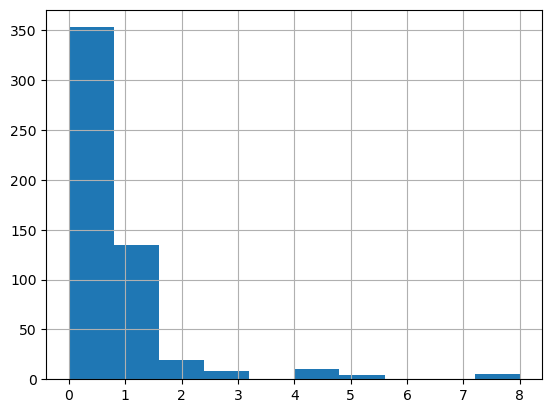

In [131]:
titanic_train.sibsp.hist()

<Axes: >

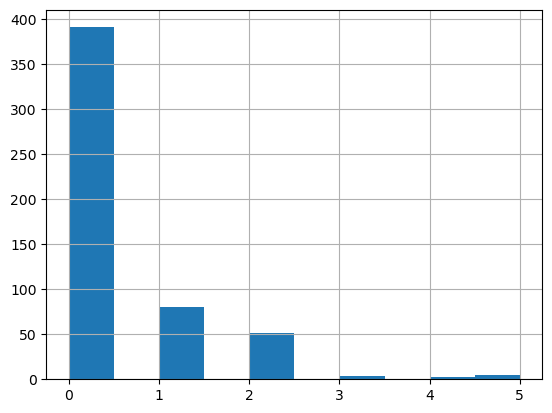

In [132]:
titanic_train.parch.hist()

<Axes: >

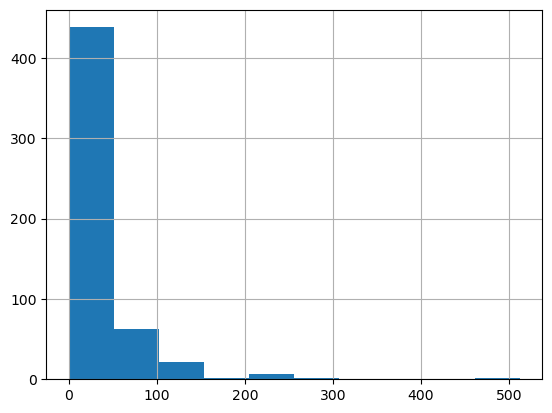

In [133]:
titanic_train.fare.hist()

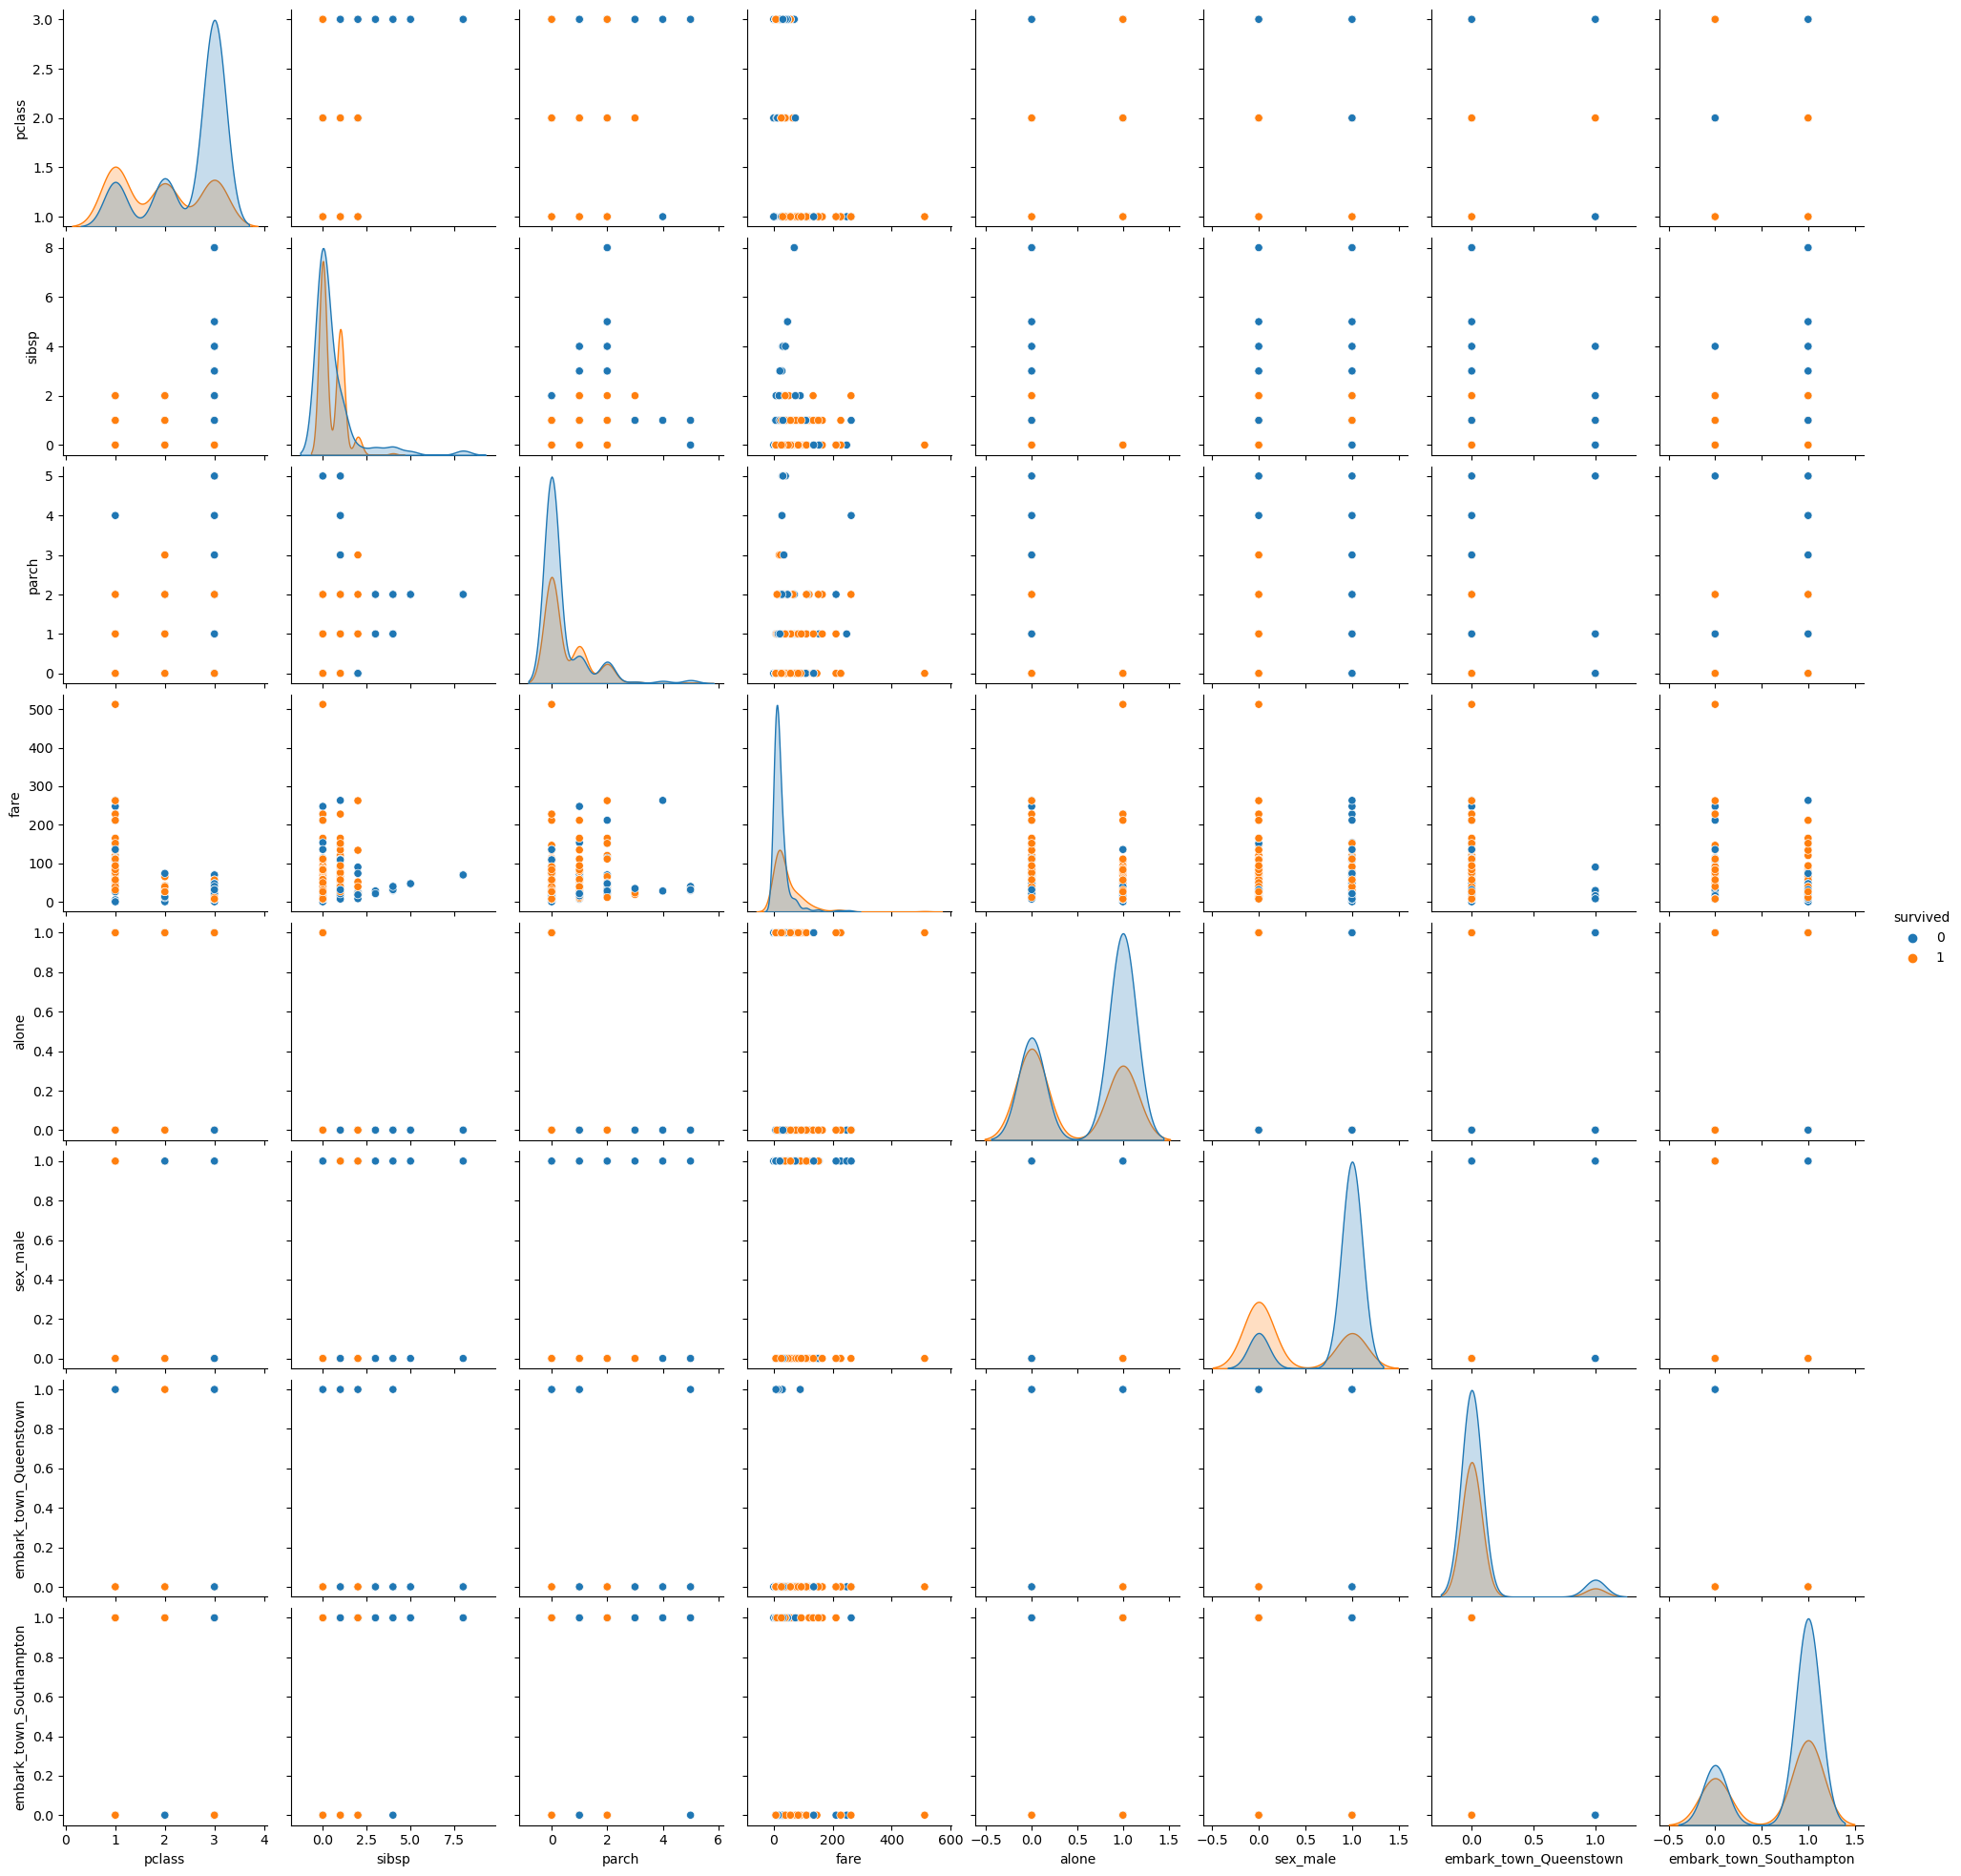

In [134]:
sns.pairplot(titanic_train, hue='survived')

Determine if it would be valuable to combine multiple columns into one.

In [135]:
No?

Object `No` not found.


Does it make sense to combine any features?

In [136]:
No?

Object `No` not found.


Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

# Part III - Telco

Explore your telco data to discover drivers of churn

In [137]:
telco = prep_telco()
telco

Unnamed: 0 customer_id  gender  senior_citizen partner dependents  \
0              0  0002-ORFBO  Female               0     Yes        Yes   
1              1  0003-MKNFE    Male               0      No         No   
2              2  0004-TLHLJ    Male               0      No         No   
3              3  0011-IGKFF    Male               1     Yes         No   
4              4  0013-EXCHZ  Female               1     Yes         No   
...          ...         ...     ...             ...     ...        ...   
7038        7038  9987-LUTYD  Female               0      No         No   
7039        7039  9992-RRAMN    Male               0     Yes         No   
7040        7040  9992-UJOEL    Male               0      No         No   
7041        7041  9993-LHIEB    Male               0     Yes        Yes   
7042        7042  9995-HOTOH    Male               0     Yes        Yes   

      tenure phone_service    multiple_lines online_security  ...  \
0          9           Yes                No              No  ...   
1          9           Yes               Yes              No  ...   
2          4           Yes                No              No  ...   
3         13           Yes                No              No  ...   
4          3           Yes                No              No  ...   
...      ...           ...               ...             ...  ...   
7038      13           Yes                No             Yes  ...   
7039      22           Yes               Yes              No  ...   
7040       2           Yes                No              No  ...   
7041      67           Yes                No             Yes  ...   
7042      63            No  No phone service             Yes  ...   

     streaming_movies_Yes paperless_billing_Yes churn_Yes  \
0                       0                     1         0   
1                       1                     0         0   
2                       0                     1         1   
3                       1                     1         1   
4                       0                     1         1   
...                   ...                   ...       ...   
7038                    0                     0         0   
7039                    1                     1         1   
7040                    0                     1         0   
7041                    1                     0         0   
7042                    1                     0         0   

     contract_type_One year contract_type_Two year  \
0                         1                      0   
1                         0                      0   
2                         0                      0   
3                         0                      0   
4                         0                      0   
...                     ...                    ...   
7038                      1                      0   
7039                      0                      0   
7040                      0                      0   
7041                      0                      1   
7042                      0                      1   

     internet_service_type_Fiber optic  internet_service_type_None  \
0                                    0                           0   
1                                    0                           0   
2                                    1                           0   
3                                    1                           0   
4                                    1                           0   
...                                ...                         ...   
7038                                 0                           0   
7039                                 1                           0   
7040                                 0                           0   
7041                                 0                           0   
7042                                 0                           0   

     payment_type_Credit card (automatic) payment_typ

In [138]:
telco.dtypes

Unnamed: 0                                 int64
customer_id                               object
gender                                    object
senior_citizen                             int64
partner                                   object
dependents                                object
tenure                                     int64
phone_service                             object
multiple_lines                            object
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
paperless_billing                         object
monthly_charges                          float64
total_charges                             object
churn                                     object
contract_type                             object
internet_service_typ

In [139]:
numerical_telco = []
categorical_telco = []
for col in telco_train:
    if type(col) == 'Object':
        categorical_telco.append(col)
    else:
        numerical_telco.append(col)

In [140]:
numerical_telco

['Unnamed: 0',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'phone_service_Yes',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_Yes',
 'churn_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service

In [141]:
categorical_telco

[]

In [142]:
telco.select_dtypes(include='number').T.shape

(31, 7043)

In [143]:
telco.select_dtypes(exclude='number').T

0               1                 2     \
customer_id              0002-ORFBO      0003-MKNFE        0004-TLHLJ   
gender                       Female            Male              Male   
partner                         Yes              No                No   
dependents                      Yes              No                No   
phone_service                   Yes             Yes               Yes   
multiple_lines                   No             Yes                No   
online_security                  No              No                No   
online_backup                   Yes              No                No   
device_protection                No              No               Yes   
tech_support                    Yes              No                No   
streaming_tv                    Yes              No                No   
streaming_movies                 No             Yes                No   
paperless_billing               Yes              No               Yes   
total_charges                 593.3           542.4            280.85   
churn                            No              No               Yes   
contract_type              One year  Month-to-month    Month-to-month   
internet_service_type           DSL             DSL       Fiber optic   
payment_type           Mailed check    Mailed check  Electronic check   

                                   3               4     \
customer_id                  0011-IGKFF      0013-EXCHZ   
gender                             Male          Female   
partner                             Yes             Yes   
dependents                           No              No   
phone_service                       Yes             Yes   
multiple_lines                       No              No   
online_security                      No              No   
online_backup                       Yes              No   
device_protection                   Yes              No   
tech_support                         No             Yes   
streaming_tv                        Yes             Yes   
streaming_movies                    Yes              No   
paperless_billing                   Yes             Yes   
total_charges                   1237.85           267.4   
churn                               Yes             Yes   
contract_type            Month-to-month  Month-to-month   
internet_service_type       Fiber optic     Fiber optic   
payment_type           Electronic check    Mailed check   

                                          5                          6     \
customer_id                         0013-MHZWF                 0013-SMEOE   
gender                                  Female                     Female   
partner                                     No                        Yes   
dependents                                 Yes                         No   
phone_service                              Yes                        Yes   
multiple_lines                              No                         No   
online_security                             No                        Yes   
online_backup                               No                        Yes   
device_protection                           No                        Yes   
tech_support                               Yes                        Yes   
streaming_tv                               Yes                        Yes   
streaming_movies                           Yes                        Yes   
paperless_billing                          Yes                        Yes   
total_charges                           571.45                    7904.25   
churn                                       No                         No   
contract_type                   Month-to-month                   Two year   
internet_service_type                      DSL                Fiber optic   
payment_type           Credit card (automatic)  Bank transfer (automatic)   

                                          7              

Determine if certain columns should be dropped

In [144]:
telco = telco.drop(columns=telco.select_dtypes(exclude='number').columns)

dropping all of these columns because the dummy columns with the binary result have all already been made and the customer_id is not necessary for the analysis

In [145]:
telco

Unnamed: 0  senior_citizen  tenure  monthly_charges  gender_Male  \
0              0               0       9            65.60            0   
1              1               0       9            59.90            1   
2              2               0       4            73.90            1   
3              3               1      13            98.00            1   
4              4               1       3            83.90            0   
...          ...             ...     ...              ...          ...   
7038        7038               0      13            55.15            0   
7039        7039               0      22            85.10            1   
7040        7040               0       2            50.30            1   
7041        7041               0      67            67.85            1   
7042        7042               0      63            59.00            1   

      partner_Yes  dependents_Yes  phone_service_Yes  \
0               1               1                  1   
1               0               0                  1   
2               0               0                  1   
3               1               0                  1   
4               1               0                  1   
...           ...             ...                ...   
7038            0               0                  1   
7039            1               0                  1   
7040            0               0                  1   
7041            1               1                  1   
7042            1               1                  0   

      multiple_lines_No phone service  multiple_lines_Yes  ...  \
0                                   0                   0  ...   
1                                   0                   1  ...   
2                                   0                   0  ...   
3                                   0                   0  ...   
4                                   0                   0  ...   
...                               ...                 ...  ...   
7038                                0                   0  ...   
7039                                0                   1  ...   
7040                                0                   0  ...   
7041                                0                   0  ...   
7042                                1                   0  ...   

      streaming_movies_Yes  paperless_billing_Yes  churn_Yes  \
0                        0                      1          0   
1                        1                      0          0   
2                        0                      1          1   
3                        1                      1          1   
4                        0                      1          1   
...                    ...                    ...        ...   
7038                     0                      0          0   
7039                     1                      1          1   
7040                     0                      1          0   
7041                     1                      0          0   
7042                     1                      0          0   

      contract_type_One year  contract_type_Two year  \
0                          1                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   
...                      ...                     ...   
7038                       1                       0   
7039                       0                       0   
7040                       0                       0   
7041                       0                       1   
7042                       0                       1   

      internet_service_type_Fiber optic  internet_service_type_None  \
0                                     0                           0   
1                                     0                           0

In [146]:
# Tried but better way abover truncated_telco = telco_train[['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'churn_Yes']]

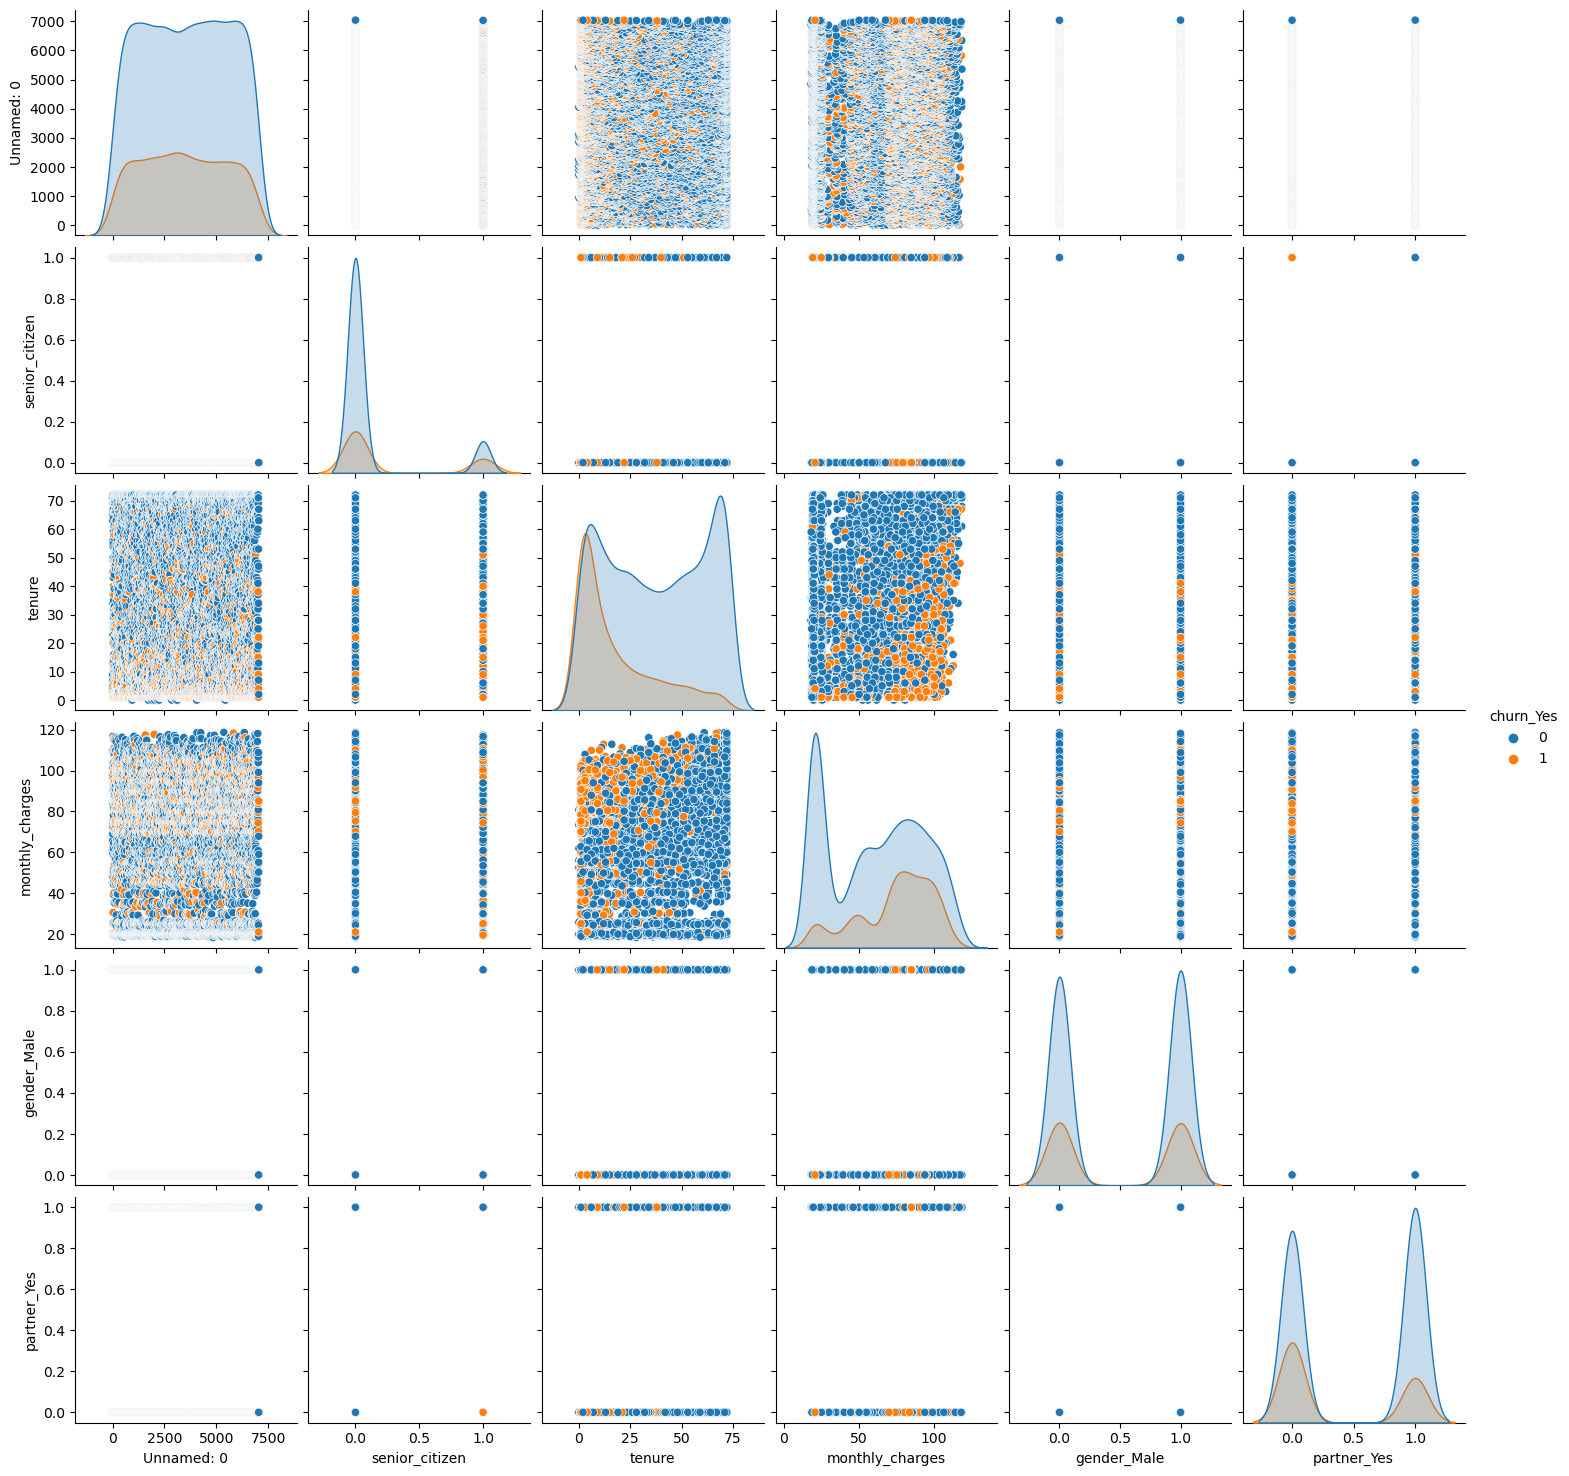

In [147]:
sns.pairplot(telco, x_vars = telco.columns[0:6], y_vars=telco.columns[0:6], hue='churn_Yes')

senior_citicen status, tenure and monthly charges seem to have some effect.  Partner status not much of an effect and gender seems to have no effect.

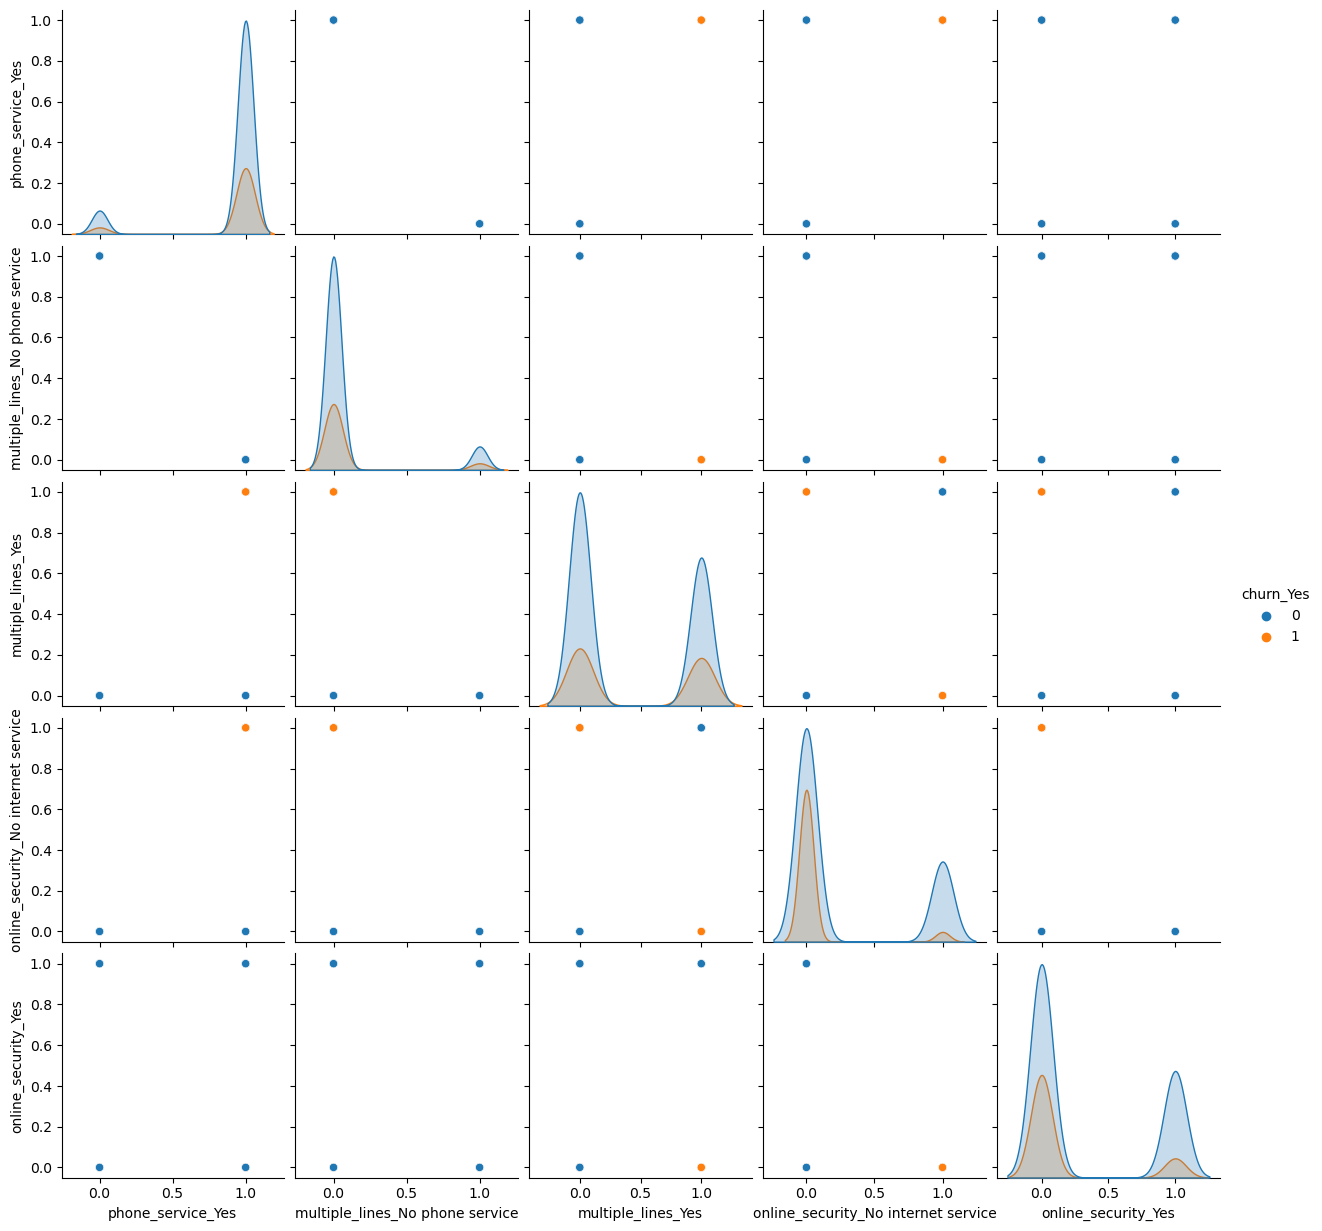

In [148]:
sns.pairplot(telco, x_vars = telco.columns[7:12], y_vars=telco.columns[7:12], hue='churn_Yes')

All of these seem to have some differential effect

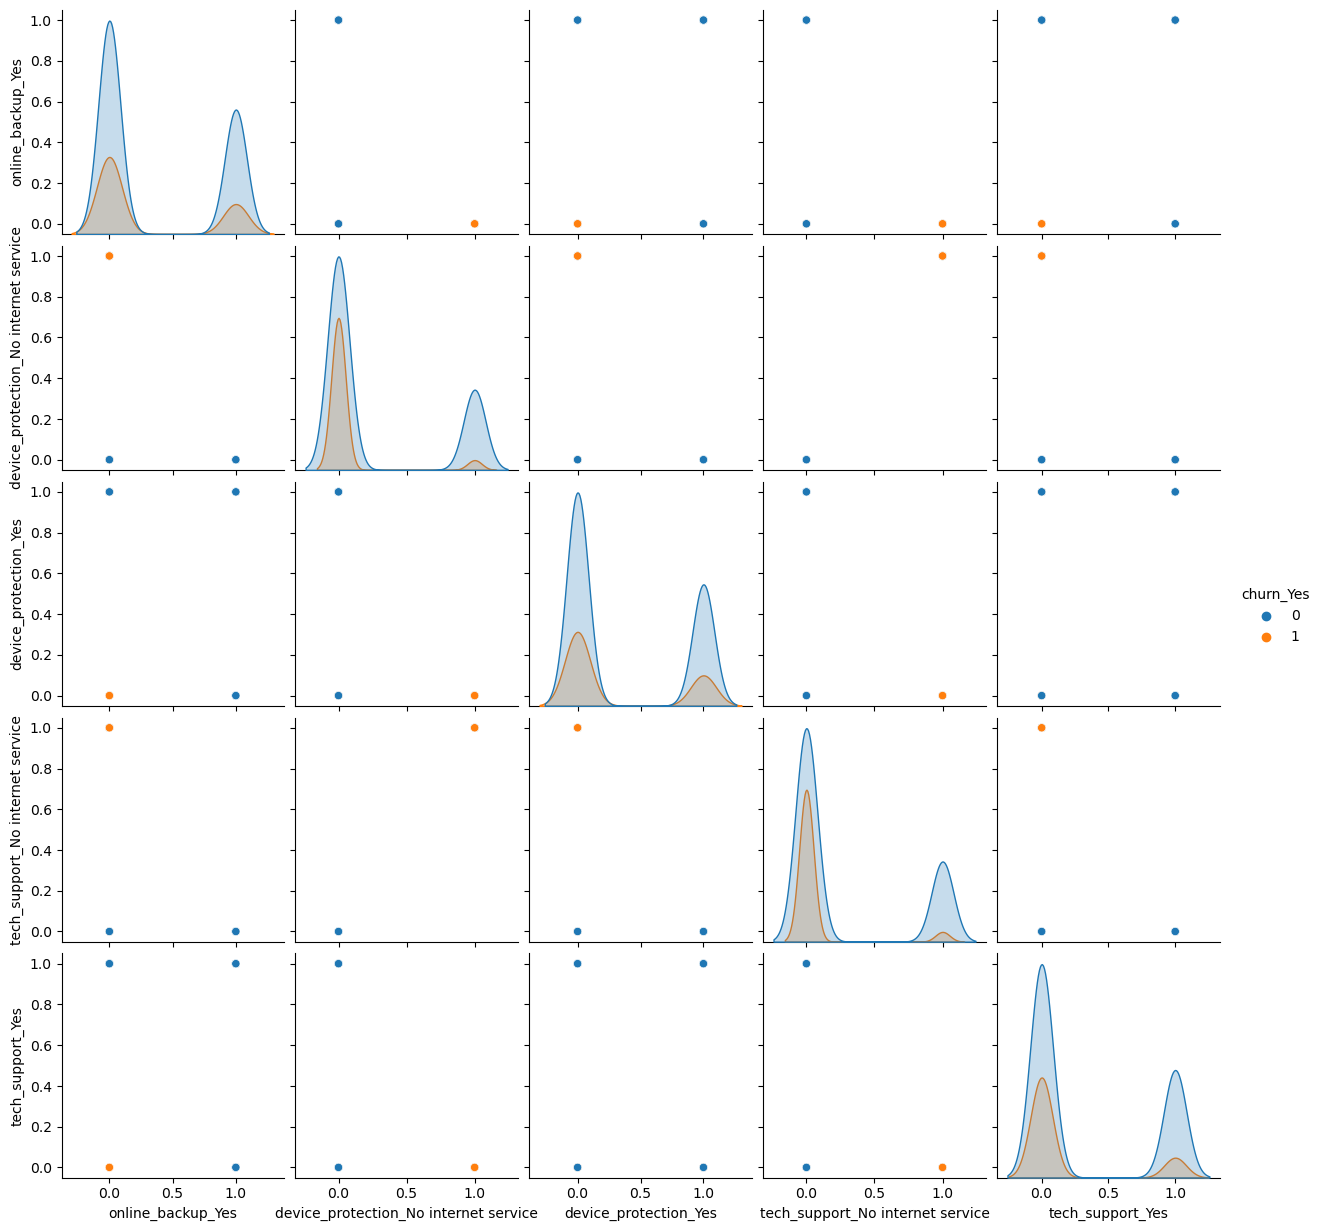

In [149]:
sns.pairplot(telco, x_vars = telco.columns[13:18], y_vars=telco.columns[13:18], hue='churn_Yes')

These also seem to have differential effects

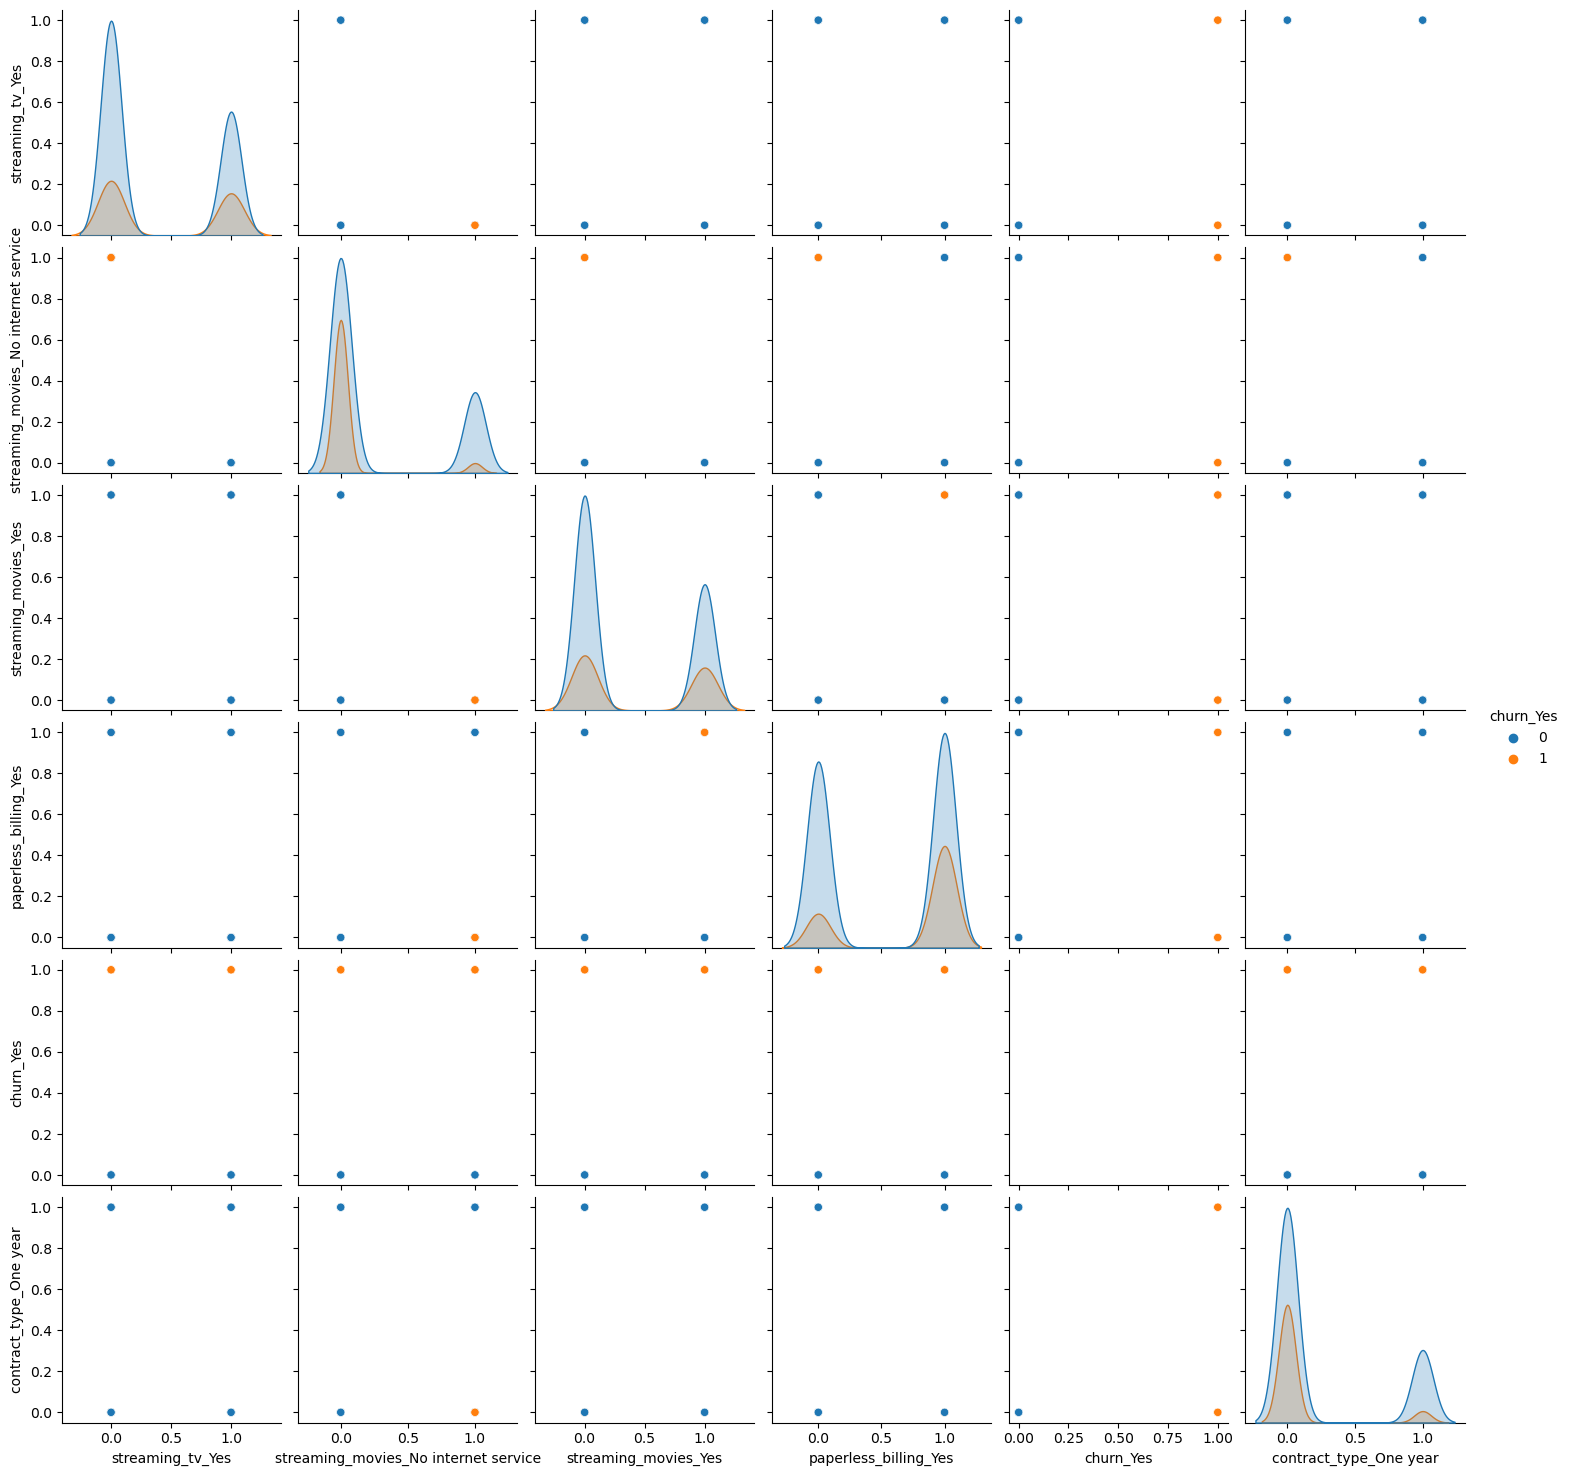

In [150]:
sns.pairplot(telco, x_vars = telco.columns[19:25], y_vars=telco.columns[19:25], hue='churn_Yes')

All of these seem to have an effect too...

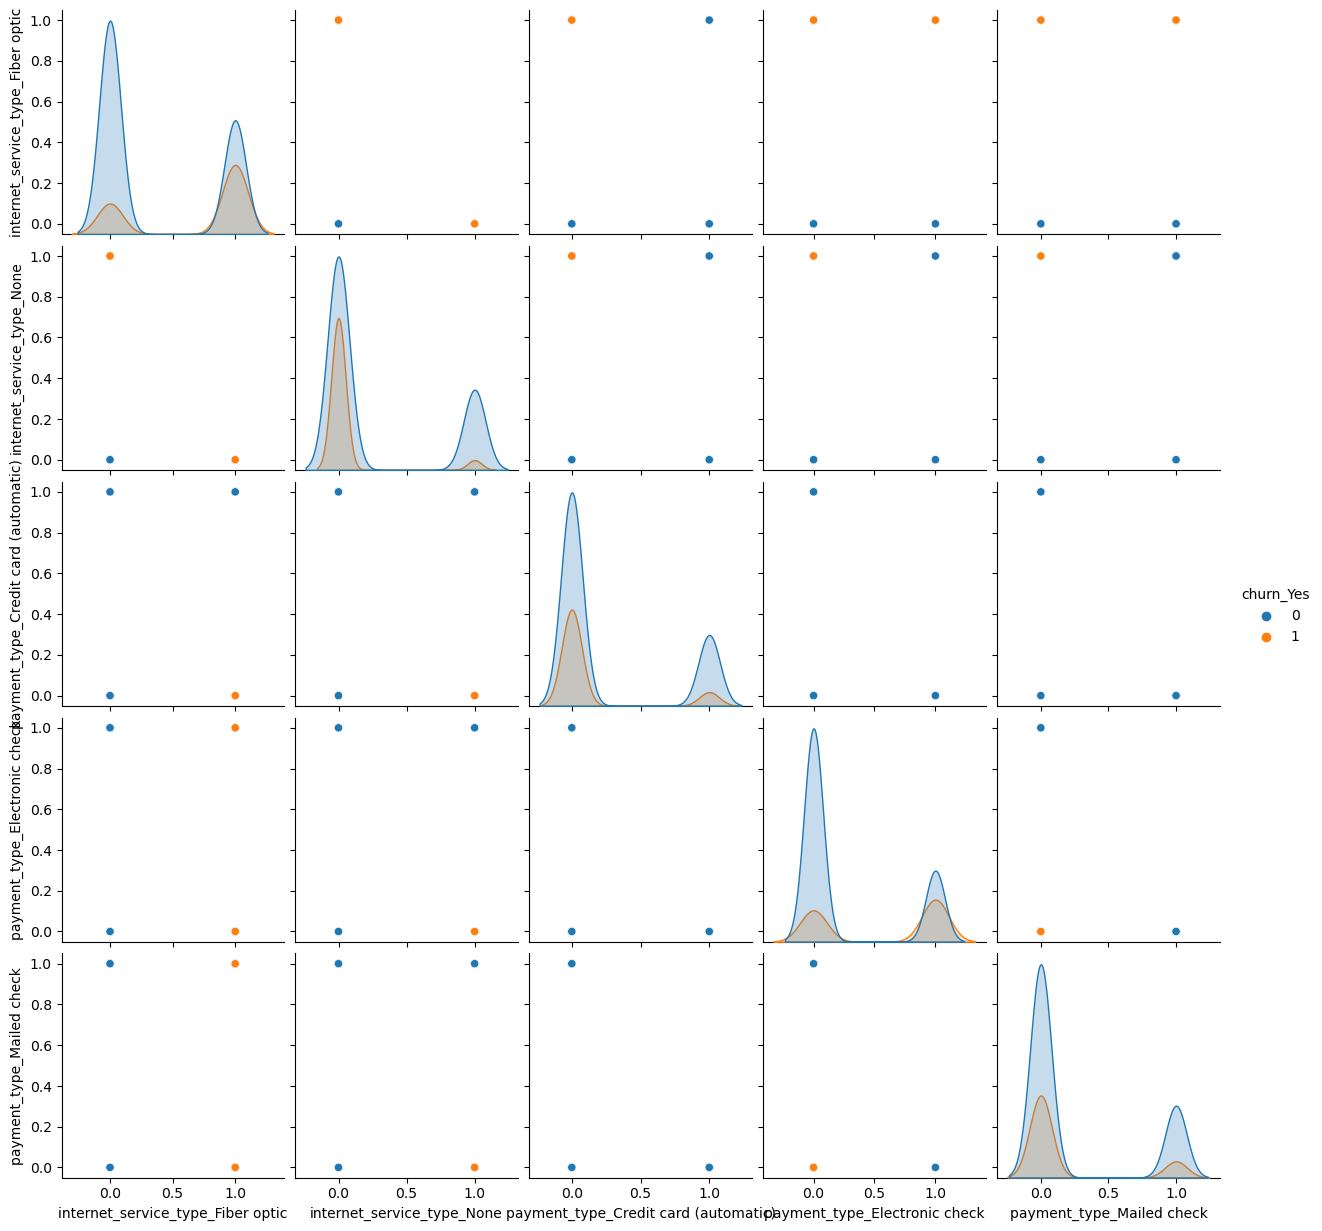

In [151]:
sns.pairplot(telco, x_vars = telco.columns[26:31], y_vars=telco.columns[26:31], hue='churn_Yes')

Since the vast majority of the columns are binary in nature I am going to run a loop for each crosstabbed with churn and run a chi squared test with the following hypothesis 

Null hypothesis:  The customer churn is independent from the status of the column in question
Alt hypothesis:  The customer churn is dependent on the column in question
Alpha < 0.01 since we have so many relationships we can settle on a higher standard for the p-value

In [152]:
for col in telco.columns:
    col = pd.crosstab(telco[col], telco.churn_Yes)
    print(col)
    col_chi2, col_p, col_degf, col_expected = stats.chi2_contingency(col)
    print(f'(chi squared = {col_chi2}, p = {col_p}')
    print('___________________________________________________________')


churn_Yes   0  1
Unnamed: 0      
0           1  0
1           1  0
2           0  1
3           0  1
4           0  1
...        .. ..
7038        1  0
7039        0  1
7040        1  0
7041        1  0
7042        1  0

[7043 rows x 2 columns]
(chi squared = 7043.0, p = 0.49439767459438705
___________________________________________________________
churn_Yes          0     1
senior_citizen            
0               4508  1393
1                666   476
(chi squared = 159.42630036838742, p = 1.510066805092378e-36
___________________________________________________________
churn_Yes    0    1
tenure             
0           11    0
1          233  380
2          115  123
3          106   94
4           93   83
5           69   64
6           70   40
7           80   51
8           81   42
9           73   46
10          71   45
11          68   31
12          79   38
13          71   38
14          52   24
15          62   37
16          52   28
17          61   26
18          73   2

As we can see we can reject the null for all the columns except Unnamed: 0, gender_Male, phone_service_Yes, multiple_lines_No phone service, churn_Yes

Clearly churn_Yes should be dependent on itself but its easier just to run the whole loop.

Unnamed: 0 is going to be independent since every row is unique

So I will drop all colums in this list EXCEPT the target.
    

In [153]:
telco = telco.drop(columns=['Unnamed: 0', 'gender_Male', 'phone_service_Yes', 'multiple_lines_No phone service'])

In [154]:
telco.T

0     1     2     3     4     5     \
senior_citizen                          0.0   0.0   0.0   1.0   1.0   0.0   
tenure                                  9.0   9.0   4.0  13.0   3.0   9.0   
monthly_charges                        65.6  59.9  73.9  98.0  83.9  69.4   
partner_Yes                             1.0   0.0   0.0   1.0   1.0   0.0   
dependents_Yes                          1.0   0.0   0.0   0.0   0.0   1.0   
multiple_lines_Yes                      0.0   1.0   0.0   0.0   0.0   0.0   
online_security_No internet service     0.0   0.0   0.0   0.0   0.0   0.0   
online_security_Yes                     0.0   0.0   0.0   0.0   0.0   0.0   
online_backup_No internet service       0.0   0.0   0.0   0.0   0.0   0.0   
online_backup_Yes                       1.0   0.0   0.0   1.0   0.0   0.0   
device_protection_No internet service   0.0   0.0   0.0   0.0   0.0   0.0   
device_protection_Yes                   0.0   0.0   1.0   1.0   0.0   0.0   
tech_support_No internet service        0.0   0.0   0.0   0.0   0.0   0.0   
tech_support_Yes                        1.0   0.0   0.0   0.0   1.0   1.0   
streaming_tv_No internet service        0.0   0.0   0.0   0.0   0.0   0.0   
streaming_tv_Yes                        1.0   0.0   0.0   1.0   1.0   1.0   
streaming_movies_No internet service    0.0   0.0   0.0   0.0   0.0   0.0   
streaming_movies_Yes                    0.0   1.0   0.0   1.0   0.0   1.0   
paperless_billing_Yes                   1.0   0.0   1.0   1.0   1.0   1.0   
churn_Yes                               0.0   0.0   1.0   1.0   1.0   0.0   
contract_type_One year                  1.0   0.0   0.0   0.0   0.0   0.0   
contract_type_Two year                  0.0   0.0   0.0   0.0   0.0   0.0   
internet_service_type_Fiber optic       0.0   0.0   1.0   1.0   1.0   0.0   
internet_service_type_None              0.0   0.0   0.0   0.0   0.0   0.0   
payment_type_Credit card (automatic)    0.0   0.0   0.0   0.0   0.0   1.0   
payment_type_Electronic check           0.0   0.0   1.0   1.0   0.0   0.0   
payment_type_Mailed check               1.0   1.0   0.0   0.0   1.0   0.0   

                                        6      7     8      9     ...  7033  \
senior_citizen                           1.0   0.00   1.0   0.00  ...   0.0   
tenure                                  71.0  63.00   7.0  65.00  ...   1.0   
monthly_charges                        109.7  84.65  48.2  90.45  ...  18.9   
partner_Yes                              1.0   1.00   0.0   1.00  ...   0.0   
dependents_Yes                           0.0   0.00   0.0   1.00  ...   0.0   
multiple_lines_Yes                       0.0   1.00   0.0   1.00  ...   0.0   
online_security_No internet service      0.0   0.00   0.0   0.00  ...   1.0   
online_security_Yes                      1.0   1.00   1.0   1.00  ...   0.0   
online_backup_No internet service        0.0   0.00   0.0   0.00  ...   1.0   
online_backup_Yes                        1.0   0.00   0.0   1.00  ...   0.0   
device_protection_No internet service    0.0   0.00   0.0   0.00  ...   1.0   
device_protection_Yes                    1.0   0.00   0.0   1.00  ...   0.0   
tech_support_No internet service         0.0   0.00   0.0   0.00  ...   1.0   
tech_support_Yes                         1.0   1.00   0.0   1.00  ...   0.0   
streaming_tv_No internet service         0.0   0.00   0.0   0.00  ...   1.0   
streaming_tv_Yes                         1.0   0.00   0.0   1.00  ...   0.0   
streaming_movies_No internet service     0.0   0.00   0.0   0.00  ...   1.0   
streaming_movies_Yes                     1.0   0.00   0.0   1.00  ...   0.0   
paperless_billing_Yes                    1.0   1.00   1.0   1.00  ...   0.0   
churn_Yes                                0.0   0.00   0.0   0.00  ...   0.0   
contract_type_One year                   0.0   0.00   0.0   0.00  ...   0.0   
contract_type_Two year                   1.0   1.00   0.0   1.00  ...   0.0   
internet_service_type_Fiber optic        1.0   1.00   0.0   0.00 

In [155]:
Determine if it would be valuable to bin some numeric columns

SyntaxError: expected 'else' after 'if' expression (3358347869.py, line 1)

It would seem useful to bin the tenure and monthly_charges column and perhaps scale to 0 and 1

In [ ]:
telco.tenure.max() - telco.tenure.min()

In [ ]:
telco.monthly_charges.max() - telco.monthly_charges.min()

In [ ]:
sns.pairplot(telco, x_vars = ['tenure', 'monthly_charges'], y_vars=['tenure', 'monthly_charges'], hue='churn_Yes')

I am going to scale the two columns to be between 0 and 1 so as to not throw off the knn metric and put too much weight on these two factors.  

I am scaling by subtracting the min of each column from each row and then dividing by the range of the rows.

I am also going to bin these by quartile.

In [ ]:
telco['tenure_normalized'] = (telco.tenure - telco.tenure.min()) / (telco.tenure.max() - telco.tenure.min())
telco

Double Check

In [ ]:
telco.tenure_normalized.max(), telco.tenure_normalized.min()

In [ ]:
telco['monthly_charges_normalized'] = (telco.monthly_charges - telco.monthly_charges.min()) / (telco.monthly_charges.max() - telco.monthly_charges.min())
telco

In [ ]:
telco.monthly_charges_normalized.min(), telco.monthly_charges_normalized.max()

Actually I don't think I need to bin it as the decision trees will break it down as necessary, the knn values will calculate the distances accordingly and the logistic regression will split it on probabilities anyway.

Determine if it would be valuable to combine multiple columns into one.

In [ ]:
#telco = prep_telco()
telco.dtypes

looking back I realize that multiple_lines_No phone service is the opposite of phone_service_Yes in terms of booleans so I ran telco prep again and then the following code

In [ ]:
#sum(telco['multiple_lines_No phone service'] == telco.phone_service_Yes)  #ran on full dataset.  No longer in df

I am going to run this in a nested loop to find if any other columns are similar (a while loop seems better for this case)

In [ ]:
telco = telco.drop(columns=['tenure', 'monthly_charges'])

In [ ]:
for col in telco.columns:
    col = pd.crosstab(telco[col], telco.churn_Yes)
    print(col)
    col_chi2, col_p, col_degf, col_expected = stats.chi2_contingency(col)
    print(f'(chi squared = {col_chi2}, p = {col_p}')
    print('___________________________________________________________')

In [ ]:
telco.dtypes

In [ ]:
i = 1
j = 1
while i <= len(telco.columns):
    if sum(telco.columns[i]) == sum(telco.columns[i-1]): #== 0 or sum(telco.columns[i] == telco.columns[i-1]) == 7043:
        print(f'{telco.columns[i]} and {telco.columns[i-1]}')
        i += 1
    else:
        i += 1
        continue
    

In [ ]:
# i = 1 
# while i <= len(telco.columns):
#     print(sum(telco.columns[1]))
#     i += 1
sum(telco.columns.loc[1])

Looking at the numbers there are a lot of columns that have the same counts with 'online_security No internet service'.

These include 'online_backup_No internet service', 'device_protection_No internet service', 'tech_support_No internet service', 'streaming_tv_No internet service', 'streaming_movies No internet service', and 'internet_service_type_None'

All the p- values for these compared to chi2 are identical which is highly indicative of the fact that these columns are identical in results combined with the fact that their names all have no internet service or some derivative of it.

In [ ]:
print(telco['online_backup_No internet service'].equals(telco['device_protection_No internet service']))
print(telco['online_backup_No internet service'].equals(telco['tech_support_No internet service']))
print(telco['online_backup_No internet service'].equals(telco['streaming_tv_No internet service']))
print(telco['online_backup_No internet service'].equals(telco['streaming_movies_No internet service']))
print(telco['online_backup_No internet service'].equals(telco['internet_service_type_None']))
print(telco['online_backup_No internet service'].equals(telco['online_security_No internet service']))


In [ ]:
telco = telco.drop(columns=['online_backup_No internet service', 'device_protection_No internet service', 'tech_support_No internet service', 'streaming_tv_No internet service', 'streaming_movies_No internet service', 'online_security_No internet service'])

In [ ]:
telco

In [ ]:
for col in telco.columns:
    col = pd.crosstab(telco[col], telco.churn_Yes)
    print(col)
    col_chi2, col_p, col_degf, col_expected = stats.chi2_contingency(col)
    print(f'(chi squared = {col_chi2}, p = {col_p}')
    print('___________________________________________________________')

What are your drivers of churn?

In [ ]:
telco.shape

In [ ]:
sns.pairplot(telco, hue='churn_Yes')

Does it make sense to combine any features?  Done above

Do you find any surprises? YES

In [ ]:
def prep_telco_alternative():
    telco_churn_db = acquire.get_telco_data()
    telco_churn_db = telco_churn_db.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])
    dummy_telco_churn_db = pd.get_dummies(telco_churn_db[['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 'payment_type']], dummy_na=False, drop_first=True)
    #Since month-to-month seems VERY correlated to churn rate I am not dropping first when doing contract type specifically for knn nearest neighbors where I have to cut down the dimensions and choose the best correlated issues.  
    #I expect the decision trees to give me more intuition on the most highly correlated dimensions to choose
    dummy_telco_churn_db_first = pd.get_dummies(telco_churn_db[['contract_type']], dummy_na=False, drop_first=False) 
    telco_churn_db = pd.concat([telco_churn_db, dummy_telco_churn_db, dummy_telco_churn_db_first], axis=1)
    return telco_churn_db

In [ ]:
telco_alternative = prep_telco_alternative()
telco_alternative.T

In [ ]:
telco_contract = telco_alternative[['contract_type_Month-to-month', 'contract_type_One year', 'contract_type_Two year', 'churn_Yes']]

In [ ]:
month = pd.crosstab(telco_contract['contract_type_Month-to-month'], telco_contract['churn_Yes'])

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(month)
chi2, p

In [ ]:
sns.pairplot(telco_contract, hue='churn_Yes')

In [ ]:
Document any and all findings and takeaways in your notebook using markdown.

In [ ]:
It seems that month to month contracts drives churn almost as much as two year contracts

In [ ]:
telco2 = acquire.get_telco_data()
telco2.T

In [221]:
df = data('Telco Customer Churn')

Exception: Not valid dataset name and no similar found! Try: data() to see available.